# Analysis - Local industry units and crime data

Local Units and linear regression....

In [2]:
try:
    print("Importing libraries...\n")
    from progressbar import ProgressBar
    from bs4 import BeautifulSoup as bts # library for web scraping
    import numpy as np # library to handle data in a vectorized manner
    import pandas as pd # library for data analysis
    from pandas.io.json import json_normalize
    import matplotlib.cm as cm
    import matplotlib.colors as colors
    import requests # library to handle requests
    from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
    import matplotlib as mp # library for visualization
    from sklearn.cluster import KMeans # import k-means from clustering stage
    from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
    import folium # map rendering library
    import lxml
    import re
    from time import sleep
    
    from matplotlib import pyplot as plt
    from matplotlib.pyplot import figure
    import seaborn as sn
    
    
    import datetime
    import dateutil

    print("All libraries imported successfully!\n")
except:
    print("ERROR: Could not import all libraries!\n")

%matplotlib inline

Importing libraries...

All libraries imported successfully!



## Retrive previously transformed data

In [3]:
adjLocalUnits = pd.read_csv('PopAdjLocalUnits.csv')
localUnits = pd.read_csv('LocalUnits.csv')

adjLocalUnits.set_index('Borough', inplace=True)
localUnits.set_index('Borough', inplace=True)


adjLocalUnits.head()

,"SIC07: 01-03 : Agriculture, forestry & fishing",SIC07: 05-39 : Production,SIC07: 41-43 : Construction,SIC07: 45 : Motor trades,SIC07: 46 : Wholesale,SIC07: 47 : Retail,SIC07: 49-53 : Transport & Storage (inc. postal),SIC07: 55-56 : Accommodation & food services,SIC07: 58-63 : Information & communication,SIC07: 64-66 : Finance & insurance,SIC07: 68 : Property,"SIC07: 69-75 : Professional, scientific & technical",SIC07: 77-82 : Business administration & support services,SIC07: 84 : Public administration & defence,SIC07: 85 : Education,SIC07: 86-88 : Health,"SIC07: 90-99 : Arts, entertainment, recreation & other services",SIC07: Total
Borough,,,,,,,,,,,,,,,,,,
City of London,28.409091,948.863636,892.045455,34.090909,727.272727,1619.318182,329.545455,1454.545455,2744.318182,4204.545455,1244.318182,9136.363636,5937.500000,62.500000,244.318182,380.681818,1215.909091,31204.545455
Barking and Dagenham,0.478469,16.028708,78.708134,10.765550,19.377990,33.971292,29.665072,20.574163,31.818182,4.306220,6.698565,37.799043,37.799043,8.133971,9.330144,23.684211,18.181818,387.320574
Barnet,0.898357,15.657084,86.883984,9.240246,30.929158,61.601643,16.298768,25.667351,69.045175,13.732033,55.056468,127.181725,58.264887,1.411704,13.860370,31.570842,41.324435,658.624230
Bexley,0.409333,18.419975,81.047892,11.051985,13.507982,33.360622,16.577978,23.741302,44.617274,7.572657,9.209988,60.990585,34.997953,1.023332,9.414654,20.057307,22.717970,408.718788
Brent,0.150557,17.314062,72.267389,12.195122,28.756399,57.061126,20.776874,28.154170,57.211683,8.130081,23.336344,79.795242,41.403192,1.957242,9.485095,22.433002,31.165312,511.592894


In [4]:
adjCrimeByBoroughMinor = pd.read_csv('PopAdjCrimeByBoroughGranularClass.csv')
adjCrimeByBoroughMajor= pd.read_csv('PopAdjCrimeByBorough.csv')

adjCrimeByBoroughMinor.set_index('Borough', inplace=True)
adjCrimeByBoroughMajor.set_index('Borough', inplace=True)


In [5]:
CrimeByBoroughMinor= pd.read_csv('CrimeByBoroughGranularClass.csv')
CrimeByBoroughMajor= pd.read_csv('CrimeByBorough.csv')

CrimeByBoroughMinor.set_index('Borough', inplace=True)
CrimeByBoroughMajor.set_index('Borough', inplace=True)


In [6]:
adjCrimeByBoroughMajor.head()

,Arson and Criminal Damage,Burglary,Drug Offences,Miscellaneous Crimes Against Society,Possession of Weapons,Public Order Offences,Robbery,Sexual Offences,Theft,Vehicle Offences,Violence Against the Person,Total Crime
Borough,,,,,,,,,,,,
Barking and Dagenham,129.282297,123.062201,142.296651,31.674641,15.885167,115.215311,75.071770,61.291866,312.870813,233.014354,616.650718,1856.315713
Barnet,99.050308,151.360370,55.261807,19.070842,7.802875,96.406571,50.462012,29.774127,275.205339,290.143737,387.089322,1461.627269
Bexley,121.080639,92.181744,67.785510,20.343840,9.496521,101.473598,24.928367,31.354892,190.912812,217.355710,430.904625,1307.818256
Brent,122.794339,132.339657,127.311051,23.456790,15.688046,123.366456,62.451069,36.916591,298.705209,252.363746,533.514002,1728.906908
Bromley,112.991766,119.518146,74.290942,20.646539,9.911558,100.365965,28.209820,31.381519,265.233303,236.992986,394.510522,1394.053114


In [7]:
adjCrimeByBoroughMinor.head()

,Absconding from Lawful Custody,Aggravated Vehicle Taking,Arson,Bail Offences,Bicycle Theft,Burglary - Business and Community,Burglary - Residential,Criminal Damage,Dangerous Driving,"Disclosure, Obstruction, False or Misleading State",...,Robbery of Personal Property,Shoplifting,Theft from Person,Theft from a Motor Vehicle,Theft or Taking of a Motor Vehicle,Threat or Possession With Intent to Commit Crimina,Violence with Injury,Violence without Injury,Violent Disorder,Total Crime
Borough,,,,,,,,,,,,,,,,,,,,,
Barking and Dagenham,0.000000,2.966507,5.454545,0.047847,16.746411,28.373206,94.688995,123.827751,1.483254,0.047847,...,69.090909,77.894737,48.516746,102.631579,102.392344,6.746411,190.813397,425.693780,0.239234,1855.980861
Barnet,0.000000,1.899384,2.926078,0.000000,14.091376,29.645791,121.714579,96.124230,0.590349,0.051335,...,45.251540,79.081109,31.801848,183.957906,67.864476,4.055441,114.784394,272.125257,0.102669,1461.601643
Bexley,0.000000,2.496930,5.034793,0.000000,7.572657,21.203438,70.978305,116.045845,1.023332,0.081867,...,21.162505,63.487515,11.420385,122.513303,60.049120,6.999591,139.255014,291.444945,0.081867,1307.736390
Brent,0.210780,2.439024,4.034929,0.030111,21.860885,26.136706,106.202951,118.759410,1.114122,0.060223,...,57.091238,62.210178,44.173442,148.479374,68.684131,5.088829,169.015357,363.896417,0.271003,1728.726335
Bromley,0.030497,1.890820,6.312900,0.000000,9.210125,27.203416,92.314730,106.678866,1.006404,0.000000,...,23.360781,115.004575,21.164989,138.487344,58.706923,6.251906,125.282098,269.136932,0.060994,1394.053114


## Combine data and visualise

In [8]:
#let's combine crime and local unit data 

MajorCrimeLocalUnits=CrimeByBoroughMajor.merge(localUnits, left_index= True, right_index=True)
MinorCrimeLocalUnit=CrimeByBoroughMinor.merge(localUnits, left_index= True, right_index=True)

In [9]:
#let's combine population adjusted  crime and local unit data 

adjMajorCrimeLocalUnits=adjCrimeByBoroughMajor.merge(adjLocalUnits, left_index= True, right_index=True)
adjMinorCrimeLocalUnits=adjCrimeByBoroughMinor.merge(adjLocalUnits, left_index= True, right_index=True)

Visualise the impact of  total industry units on four different major crime categories

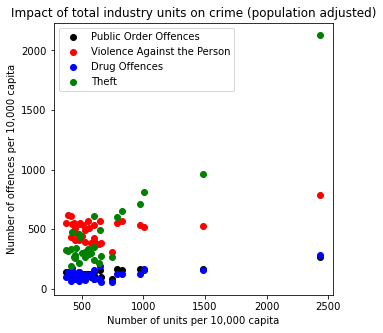

In [10]:
industry= 'SIC07: Total'
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(adjMajorCrimeLocalUnits[industry],adjMajorCrimeLocalUnits['Public Order Offences'],'o', color='black', label ='Public Order Offences' )
plt.plot(adjMajorCrimeLocalUnits[industry],adjMajorCrimeLocalUnits['Violence Against the Person'],'o', color='red', label = 'Violence Against the Person')
plt.plot(adjMajorCrimeLocalUnits[industry],adjMajorCrimeLocalUnits['Drug Offences'],'o', color='blue', label = 'Drug Offences')
plt.plot(adjMajorCrimeLocalUnits[industry],adjMajorCrimeLocalUnits['Theft'],'o', color='green', label ='Theft')
plt.title("Impact of total industry units on crime (population adjusted)")
plt.xlabel("Number of units per 10,000 capita")
plt.ylabel("Number of offences per 10,000 capita")
plt.legend()

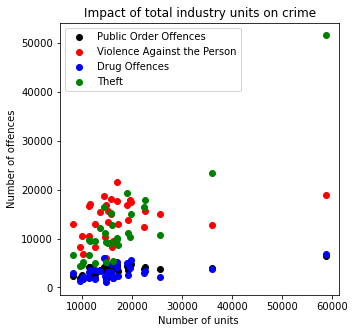

In [11]:
ndustry= 'SIC07: Total'
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(MajorCrimeLocalUnits[industry],MajorCrimeLocalUnits['Public Order Offences'],'o', color='black', label ='Public Order Offences' )
plt.plot(MajorCrimeLocalUnits[industry],MajorCrimeLocalUnits['Violence Against the Person'],'o', color='red', label = 'Violence Against the Person')
plt.plot(MajorCrimeLocalUnits[industry],MajorCrimeLocalUnits['Drug Offences'],'o', color='blue', label = 'Drug Offences')
plt.plot(MajorCrimeLocalUnits[industry],MajorCrimeLocalUnits['Theft'],'o', color='green', label ='Theft')
plt.title("Impact of total industry units on crime")
plt.xlabel("Number of units ")
plt.ylabel("Number of offences")
plt.legend()

There is an outlier - check if it is Westminster

In [12]:
# checkwestminster is the outlier
adjMajorCrimeLocalUnits.loc['Westminster', ['Total Crime', 'SIC07: Total']]

Total Crime     4614.415333
SIC07: Total    2433.292160
Name: Westminster, dtype: float64

Westminster is the outlier, conside replot the data without, so that the correlation (or absence of) in the main cluster can be seen more clearly.

In [13]:
plotData =adjMajorCrimeLocalUnits.drop(index='Westminster')

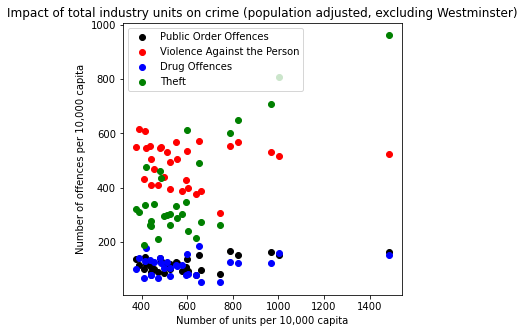

In [14]:
industry= 'SIC07: Total'
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(plotData[industry],plotData['Public Order Offences'],'o', color='black', label ='Public Order Offences' )
plt.plot(plotData[industry],plotData['Violence Against the Person'],'o', color='red', label = 'Violence Against the Person')
plt.plot(plotData[industry],plotData['Drug Offences'],'o', color='blue', label = 'Drug Offences')
plt.plot(plotData[industry],plotData['Theft'],'o', color='green', label ='Theft')
plt.title("Impact of total industry units on crime (population adjusted, excluding Westminster)")
plt.xlabel("Number of units per 10,000 capita")
plt.ylabel("Number of offences per 10,000 capita")
plt.legend()

On inspection, Theft appears to be the crime most correlated to industry units.


Next, lets break this down to look at individual industry types, considering population adjusted and raw data

In [15]:
plotDataRaw=MajorCrimeLocalUnits.drop(index='Westminster')

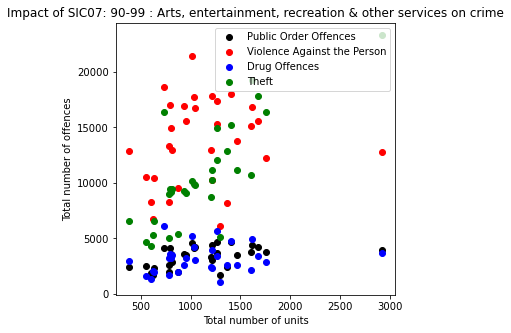

In [16]:


industry= 'SIC07: 90-99 : Arts, entertainment, recreation & other services'
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(plotDataRaw[industry],plotDataRaw['Public Order Offences'],'o', color='black', label='Public Order Offences')
plt.plot(plotDataRaw[industry],plotDataRaw['Violence Against the Person'],'o', color='red', label = 'Violence Against the Person')
plt.plot(plotDataRaw[industry],plotDataRaw['Drug Offences'],'o', color='blue', label= 'Drug Offences')
plt.plot(plotDataRaw[industry],plotDataRaw['Theft'],'o', color='green', label= 'Theft')
plt.title("Impact of "+ industry +" on crime")
plt.xlabel("Total number of units")
plt.ylabel("Total number of offences")
plt.legend()


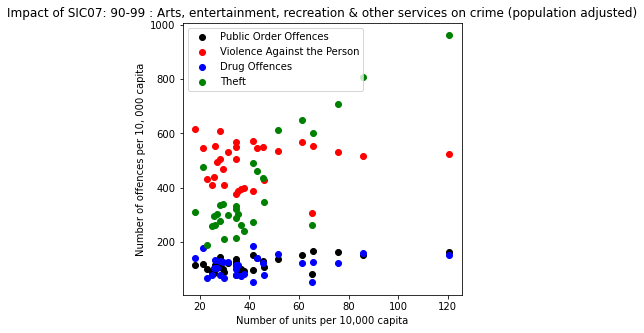

In [17]:

industry= 'SIC07: 90-99 : Arts, entertainment, recreation & other services'
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(plotData[industry],plotData['Public Order Offences'],'o', color='black', label='Public Order Offences')
plt.plot(plotData[industry],plotData['Violence Against the Person'],'o', color='red', label = 'Violence Against the Person')
plt.plot(plotData[industry],plotData['Drug Offences'],'o', color='blue', label= 'Drug Offences')
plt.plot(plotData[industry],plotData['Theft'],'o', color='green', label ='Theft')
plt.title("Impact of "+ industry +" on crime (population adjusted)")
plt.xlabel("Number of units per 10,000 capita")
plt.ylabel("Number of offences per 10, 000 capita")
plt.legend()

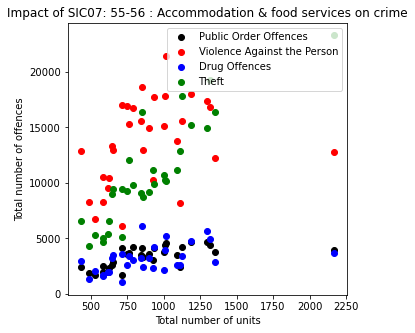

In [18]:

industry= 'SIC07: 55-56 : Accommodation & food services'
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(plotDataRaw[industry],plotDataRaw['Public Order Offences'],'o', color='black', label='Public Order Offences')
plt.plot(plotDataRaw[industry],plotDataRaw['Violence Against the Person'],'o', color='red', label = 'Violence Against the Person')
plt.plot(plotDataRaw[industry],plotDataRaw['Drug Offences'],'o', color='blue', label='Drug Offences')
plt.plot(plotDataRaw[industry],plotDataRaw['Theft'],'o', color='green', label= 'Theft')
plt.title("Impact of "+ industry +" on crime")
plt.xlabel("Total number of units")
plt.ylabel("Total number of offences")
plt.legend()


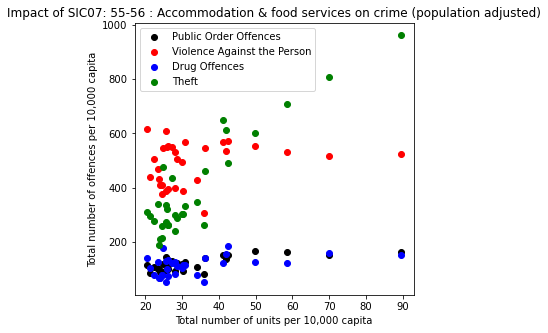

In [19]:
industry= 'SIC07: 55-56 : Accommodation & food services'
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(plotData[industry],plotData['Public Order Offences'],'o', color='black', label='Public Order Offences')
plt.plot(plotData[industry],plotData['Violence Against the Person'],'o', color='red', label = 'Violence Against the Person')
plt.plot(plotData[industry],plotData['Drug Offences'],'o', color='blue', label='Drug Offences')
plt.plot(plotData[industry],plotData['Theft'],'o', color='green', label ='Theft')
plt.title("Impact of "+ industry +" on crime (population adjusted)")
plt.xlabel("Total number of units per 10,000 capita")
plt.ylabel("Total number of offences per 10,000 capita")
plt.legend()

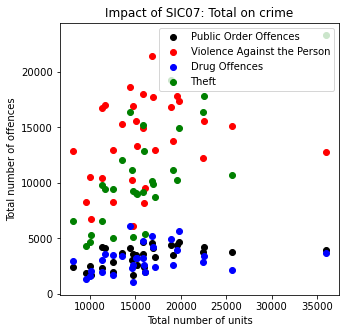

In [20]:
industry= 'SIC07: Total'
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(plotDataRaw[industry],plotDataRaw['Public Order Offences'],'o', color='black', label='Public Order Offences')
plt.plot(plotDataRaw[industry],plotDataRaw['Violence Against the Person'],'o', color='red', label = 'Violence Against the Person')
plt.plot(plotDataRaw[industry],plotDataRaw['Drug Offences'],'o', color='blue', label='Drug Offences')
plt.plot(plotDataRaw[industry],plotDataRaw['Theft'],'o', color='green', label= 'Theft')
plt.title("Impact of "+ industry +" on crime")
plt.xlabel("Total number of units")
plt.ylabel("Total number of offences")
plt.legend()


**Observation:** The correlation between crimes and industry units is weakened when population adjusted

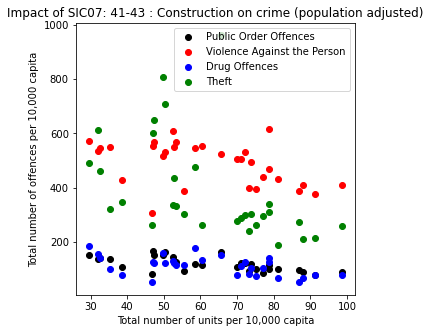

In [21]:

industry= 'SIC07: 41-43 : Construction'
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(plotData[industry],plotData['Public Order Offences'],'o', color='black', label='Public Order Offences')
plt.plot(plotData[industry],plotData['Violence Against the Person'],'o', color='red', label = 'Violence Against the Person')
plt.plot(plotData[industry],plotData['Drug Offences'],'o', color='blue', label='Drug Offences')
plt.plot(plotData[industry],plotData['Theft'],'o', color='green', label ='Theft')
plt.title("Impact of "+ industry +" on crime (population adjusted)")
plt.xlabel("Total number of units per 10,000 capita")
plt.ylabel("Total number of offences per 10,000 capita")
plt.legend()

construction appears to have negative correlation to violent crime!

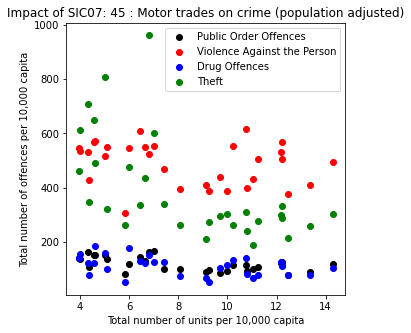

In [22]:
industry= 'SIC07: 45 : Motor trades'
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(plotData[industry],plotData['Public Order Offences'],'o', color='black', label='Public Order Offences')
plt.plot(plotData[industry],plotData['Violence Against the Person'],'o', color='red', label = 'Violence Against the Person')
plt.plot(plotData[industry],plotData['Drug Offences'],'o', color='blue', label='Drug Offences')
plt.plot(plotData[industry],plotData['Theft'],'o', color='green', label ='Theft')
plt.title("Impact of "+ industry +" on crime (population adjusted)")
plt.xlabel("Total number of units per 10,000 capita")
plt.ylabel("Total number of offences per 10,000 capita")
plt.legend()

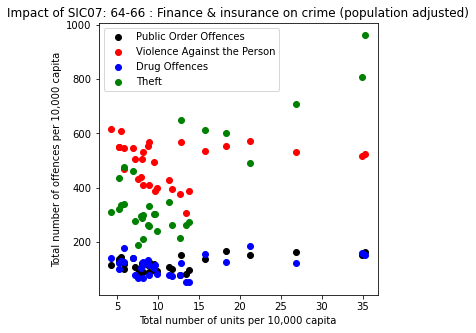

In [23]:

industry= 'SIC07: 64-66 : Finance & insurance'
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(plotData[industry],plotData['Public Order Offences'],'o', color='black', label='Public Order Offences')
plt.plot(plotData[industry],plotData['Violence Against the Person'],'o', color='red', label = 'Violence Against the Person')
plt.plot(plotData[industry],plotData['Drug Offences'],'o', color='blue', label='Drug Offences')
plt.plot(plotData[industry],plotData['Theft'],'o', color='green', label ='Theft')
plt.title("Impact of "+ industry +" on crime (population adjusted)")
plt.xlabel("Total number of units per 10,000 capita")
plt.ylabel("Total number of offences per 10,000 capita")
plt.legend()

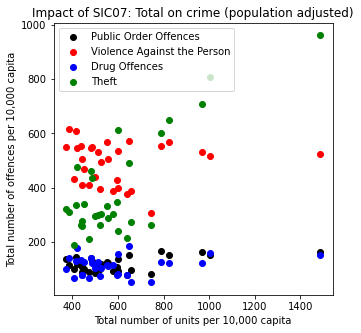

In [24]:
industry= 'SIC07: Total'
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(plotData[industry],plotData['Public Order Offences'],'o', color='black', label='Public Order Offences')
plt.plot(plotData[industry],plotData['Violence Against the Person'],'o', color='red', label = 'Violence Against the Person')
plt.plot(plotData[industry],plotData['Drug Offences'],'o', color='blue', label='Drug Offences')
plt.plot(plotData[industry],plotData['Theft'],'o', color='green', label ='Theft')
plt.title("Impact of "+ industry +" on crime (population adjusted)")
plt.xlabel("Total number of units per 10,000 capita")
plt.ylabel("Total number of offences per 10,000 capita")
plt.legend()

**Obsevation** Theft and violence against person have clearest correlation with number of units, howver when adjusting for population size (and considering crimes and units per capita) only theft appears correlated.  Some industries, such as contruction have indications of a reverse trend ie negative correlation.

To examine futher and systematically, we will conduct correlation analysis against the entire dataset including the minor crime categorisations.

## Correlation analysis for population adjusted crime and local units

In [25]:
adjMajorCrimeLocalUnits.head()

,Arson and Criminal Damage,Burglary,Drug Offences,Miscellaneous Crimes Against Society,Possession of Weapons,Public Order Offences,Robbery,Sexual Offences,Theft,Vehicle Offences,...,SIC07: 58-63 : Information & communication,SIC07: 64-66 : Finance & insurance,SIC07: 68 : Property,"SIC07: 69-75 : Professional, scientific & technical",SIC07: 77-82 : Business administration & support services,SIC07: 84 : Public administration & defence,SIC07: 85 : Education,SIC07: 86-88 : Health,"SIC07: 90-99 : Arts, entertainment, recreation & other services",SIC07: Total
Borough,,,,,,,,,,,,,,,,,,,,,
Barking and Dagenham,129.282297,123.062201,142.296651,31.674641,15.885167,115.215311,75.071770,61.291866,312.870813,233.014354,...,31.818182,4.306220,6.698565,37.799043,37.799043,8.133971,9.330144,23.684211,18.181818,387.320574
Barnet,99.050308,151.360370,55.261807,19.070842,7.802875,96.406571,50.462012,29.774127,275.205339,290.143737,...,69.045175,13.732033,55.056468,127.181725,58.264887,1.411704,13.860370,31.570842,41.324435,658.624230
Bexley,121.080639,92.181744,67.785510,20.343840,9.496521,101.473598,24.928367,31.354892,190.912812,217.355710,...,44.617274,7.572657,9.209988,60.990585,34.997953,1.023332,9.414654,20.057307,22.717970,408.718788
Brent,122.794339,132.339657,127.311051,23.456790,15.688046,123.366456,62.451069,36.916591,298.705209,252.363746,...,57.211683,8.130081,23.336344,79.795242,41.403192,1.957242,9.485095,22.433002,31.165312,511.592894
Bromley,112.991766,119.518146,74.290942,20.646539,9.911558,100.365965,28.209820,31.381519,265.233303,236.992986,...,65.568771,11.741385,15.858493,106.892345,49.405306,0.762428,11.741385,25.617566,36.749009,523.482769


In [26]:
adjMajorCrimeLocalUnits.corr().head()

,Arson and Criminal Damage,Burglary,Drug Offences,Miscellaneous Crimes Against Society,Possession of Weapons,Public Order Offences,Robbery,Sexual Offences,Theft,Vehicle Offences,...,SIC07: 58-63 : Information & communication,SIC07: 64-66 : Finance & insurance,SIC07: 68 : Property,"SIC07: 69-75 : Professional, scientific & technical",SIC07: 77-82 : Business administration & support services,SIC07: 84 : Public administration & defence,SIC07: 85 : Education,SIC07: 86-88 : Health,"SIC07: 90-99 : Arts, entertainment, recreation & other services",SIC07: Total
Arson and Criminal Damage,1.000000,0.618078,0.741151,0.822387,0.804577,0.853328,0.681522,0.732760,0.645517,0.398431,...,0.363416,0.546018,0.473324,0.390115,0.503515,0.557203,0.360454,0.373249,0.487114,0.459138
Burglary,0.618078,1.000000,0.680586,0.530102,0.673875,0.875331,0.835301,0.642789,0.862466,0.493922,...,0.752423,0.718805,0.780316,0.810925,0.811484,0.559600,0.777172,0.754367,0.848656,0.800588
Drug Offences,0.741151,0.680586,1.000000,0.803971,0.836646,0.840224,0.790966,0.852067,0.814682,0.245811,...,0.511405,0.698011,0.651169,0.562221,0.689234,0.714863,0.508045,0.568538,0.626854,0.637609
Miscellaneous Crimes Against Society,0.822387,0.530102,0.803971,1.000000,0.753841,0.785710,0.662110,0.812458,0.692259,0.311734,...,0.349847,0.696954,0.613034,0.389015,0.569623,0.713379,0.301060,0.455270,0.496792,0.527961
Possession of Weapons,0.804577,0.673875,0.836646,0.753841,1.000000,0.813852,0.819652,0.881944,0.684436,0.264755,...,0.353941,0.523846,0.487240,0.384783,0.485737,0.525224,0.303888,0.362125,0.478382,0.434849


In [27]:

#pull out the data we are interested in - impact of venues on crimes
heat_map =adjMajorCrimeLocalUnits.corr().loc[ adjLocalUnits.columns,adjCrimeByBoroughMajor.columns]
heat_map

,Arson and Criminal Damage,Burglary,Drug Offences,Miscellaneous Crimes Against Society,Possession of Weapons,Public Order Offences,Robbery,Sexual Offences,Theft,Vehicle Offences,Violence Against the Person,Total Crime
"SIC07: 01-03 : Agriculture, forestry & fishing",0.329184,0.598982,0.450418,0.448281,0.267819,0.555414,0.488942,0.334869,0.771339,0.309954,0.283045,0.665959
SIC07: 05-39 : Production,0.513841,0.761981,0.623935,0.517613,0.449443,0.767756,0.753279,0.497860,0.902297,0.269392,0.494380,0.832100
SIC07: 41-43 : Construction,-0.016335,-0.042957,0.061590,0.259820,-0.104617,0.020054,0.106838,-0.052328,0.285948,0.121185,0.008339,0.184555
SIC07: 45 : Motor trades,-0.316703,-0.554782,-0.371379,-0.101958,-0.481100,-0.465112,-0.479390,-0.448466,-0.396200,-0.041002,-0.267796,-0.413051
SIC07: 46 : Wholesale,0.376964,0.723460,0.583615,0.499289,0.311002,0.682994,0.651349,0.395076,0.832014,0.373934,0.422797,0.765662
SIC07: 47 : Retail,0.452612,0.776727,0.675153,0.514291,0.427518,0.757321,0.702094,0.502542,0.925367,0.355618,0.453196,0.845064
SIC07: 49-53 : Transport & Storage (inc. postal),0.179077,-0.055133,0.182799,0.405046,-0.024961,0.077911,0.051698,0.001996,0.114594,0.175806,0.262233,0.145664
SIC07: 55-56 : Accommodation & food services,0.569842,0.841764,0.730899,0.609390,0.552834,0.853760,0.774508,0.615587,0.974053,0.282035,0.558958,0.908680
SIC07: 58-63 : Information & communication,0.363416,0.752423,0.511405,0.349847,0.353941,0.701259,0.649264,0.402985,0.795864,0.078290,0.350736,0.706213
SIC07: 64-66 : Finance & insurance,0.546018,0.718805,0.698011,0.696954,0.523846,0.771046,0.721804,0.587225,0.930906,0.271758,0.543971,0.861884


**Create a heat map to sure the strength of correlation between crimes and industry**

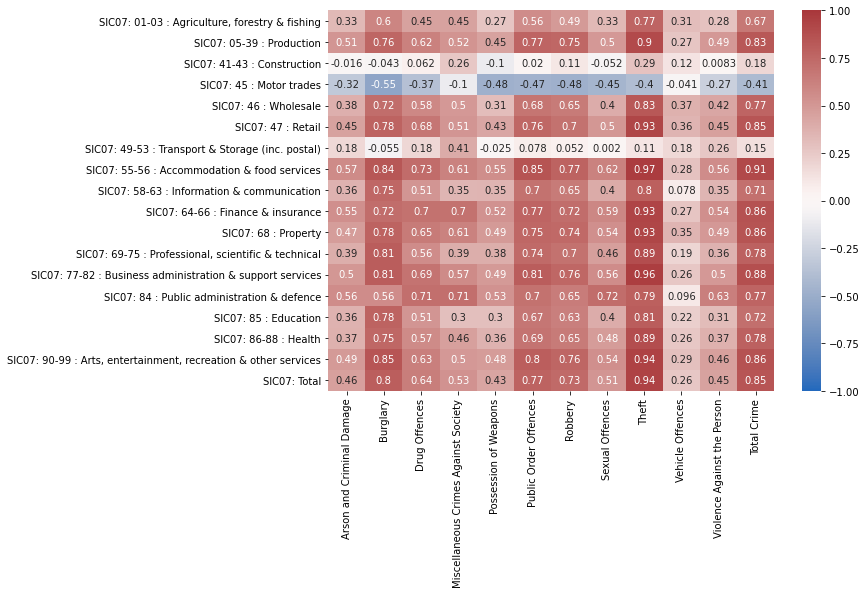

In [28]:
#in this palette stronger the colour the stronger the correlation, reds for positive, blue for negative


fig_dims = (10,7)
fig, ax = plt.subplots(figsize=fig_dims)

sn.color_palette("vlag", as_cmap=True)
sn.heatmap(heat_map, annot=True, cmap="vlag", vmin=-1, vmax=1)
plt.show()

Repeat for minor crime classifications

In [29]:
adjMinorCrimeLocalUnits.head()

,Absconding from Lawful Custody,Aggravated Vehicle Taking,Arson,Bail Offences,Bicycle Theft,Burglary - Business and Community,Burglary - Residential,Criminal Damage,Dangerous Driving,"Disclosure, Obstruction, False or Misleading State",...,SIC07: 58-63 : Information & communication,SIC07: 64-66 : Finance & insurance,SIC07: 68 : Property,"SIC07: 69-75 : Professional, scientific & technical",SIC07: 77-82 : Business administration & support services,SIC07: 84 : Public administration & defence,SIC07: 85 : Education,SIC07: 86-88 : Health,"SIC07: 90-99 : Arts, entertainment, recreation & other services",SIC07: Total
Borough,,,,,,,,,,,,,,,,,,,,,
Barking and Dagenham,0.000000,2.966507,5.454545,0.047847,16.746411,28.373206,94.688995,123.827751,1.483254,0.047847,...,31.818182,4.306220,6.698565,37.799043,37.799043,8.133971,9.330144,23.684211,18.181818,387.320574
Barnet,0.000000,1.899384,2.926078,0.000000,14.091376,29.645791,121.714579,96.124230,0.590349,0.051335,...,69.045175,13.732033,55.056468,127.181725,58.264887,1.411704,13.860370,31.570842,41.324435,658.624230
Bexley,0.000000,2.496930,5.034793,0.000000,7.572657,21.203438,70.978305,116.045845,1.023332,0.081867,...,44.617274,7.572657,9.209988,60.990585,34.997953,1.023332,9.414654,20.057307,22.717970,408.718788
Brent,0.210780,2.439024,4.034929,0.030111,21.860885,26.136706,106.202951,118.759410,1.114122,0.060223,...,57.211683,8.130081,23.336344,79.795242,41.403192,1.957242,9.485095,22.433002,31.165312,511.592894
Bromley,0.030497,1.890820,6.312900,0.000000,9.210125,27.203416,92.314730,106.678866,1.006404,0.000000,...,65.568771,11.741385,15.858493,106.892345,49.405306,0.762428,11.741385,25.617566,36.749009,523.482769


In [30]:
adjMinorCrimeLocalUnits.corr().head()

,Absconding from Lawful Custody,Aggravated Vehicle Taking,Arson,Bail Offences,Bicycle Theft,Burglary - Business and Community,Burglary - Residential,Criminal Damage,Dangerous Driving,"Disclosure, Obstruction, False or Misleading State",...,SIC07: 58-63 : Information & communication,SIC07: 64-66 : Finance & insurance,SIC07: 68 : Property,"SIC07: 69-75 : Professional, scientific & technical",SIC07: 77-82 : Business administration & support services,SIC07: 84 : Public administration & defence,SIC07: 85 : Education,SIC07: 86-88 : Health,"SIC07: 90-99 : Arts, entertainment, recreation & other services",SIC07: Total
Absconding from Lawful Custody,1.000000,-0.177014,-0.117280,0.586816,0.276425,-0.038888,0.425798,-0.133675,-0.005136,-0.165379,...,0.144016,-0.111684,-0.018156,0.020391,-0.069221,-0.210051,0.006587,-0.114288,-0.058703,-0.042690
Aggravated Vehicle Taking,-0.177014,1.000000,0.572094,-0.081571,-0.482767,-0.344791,-0.226209,0.222665,0.375703,-0.217876,...,-0.672878,-0.400711,-0.465087,-0.621058,-0.527881,-0.211771,-0.543510,-0.559939,-0.531991,-0.555283
Arson,-0.117280,0.572094,1.000000,0.251403,-0.170885,-0.133435,-0.172867,0.420649,0.482945,0.031493,...,-0.270965,-0.175035,-0.292895,-0.360799,-0.258002,-0.093175,-0.299578,-0.405673,-0.311170,-0.309513
Bail Offences,0.586816,-0.081571,0.251403,1.000000,0.497132,0.177193,0.438181,0.230444,0.304356,0.064437,...,0.281218,0.067828,0.096328,0.122413,0.092817,0.013404,0.187164,-0.022131,0.068567,0.092570
Bicycle Theft,0.276425,-0.482767,-0.170885,0.497132,1.000000,0.681933,0.744610,0.432011,-0.014880,0.210556,...,0.781472,0.455083,0.507935,0.732348,0.653526,0.417763,0.725141,0.538123,0.696863,0.633077


In [31]:

#pull out the data we are interested in - impact of venues on crimes
heat_map_minor =adjMinorCrimeLocalUnits.corr().loc[ adjLocalUnits.columns,adjCrimeByBoroughMinor.columns]
heat_map_minor.dropna(axis=1, inplace=True)
heat_map_minor

,Absconding from Lawful Custody,Aggravated Vehicle Taking,Arson,Bail Offences,Bicycle Theft,Burglary - Business and Community,Burglary - Residential,Criminal Damage,Dangerous Driving,"Disclosure, Obstruction, False or Misleading State",...,Robbery of Personal Property,Shoplifting,Theft from Person,Theft from a Motor Vehicle,Theft or Taking of a Motor Vehicle,Threat or Possession With Intent to Commit Crimina,Violence with Injury,Violence without Injury,Violent Disorder,Total Crime
"SIC07: 01-03 : Agriculture, forestry & fishing",-0.215342,-0.441644,-0.206747,-0.083612,0.304444,0.753300,0.298703,0.350515,-0.128417,0.467163,...,0.488851,0.835755,0.734485,0.441110,-0.161711,-0.210114,0.295747,0.272785,0.823031,0.666311
SIC07: 05-39 : Production,-0.050795,-0.415176,-0.215409,0.116277,0.607106,0.918766,0.423094,0.540655,-0.069364,0.356825,...,0.752054,0.679657,0.910976,0.437951,-0.222830,-0.252027,0.495498,0.487158,0.806344,0.832361
SIC07: 41-43 : Construction,-0.268632,-0.064025,-0.138010,-0.304572,-0.354977,0.247229,-0.349948,-0.008438,-0.071943,0.251880,...,0.107979,0.427547,0.336827,0.088321,0.123275,0.129328,-0.050286,0.041740,0.409339,0.185183
SIC07: 45 : Motor trades,-0.153068,0.229526,-0.021411,-0.317028,-0.695571,-0.405015,-0.595855,-0.323919,-0.153112,-0.144969,...,-0.475124,-0.178186,-0.367851,-0.164216,0.213292,0.435028,-0.359967,-0.211871,-0.248662,-0.412782
SIC07: 46 : Wholesale,0.014577,-0.495155,-0.337629,0.103996,0.519127,0.843833,0.432768,0.407483,-0.112030,0.398718,...,0.654669,0.647158,0.818270,0.545787,-0.212492,-0.332905,0.387808,0.436869,0.807188,0.765858
SIC07: 47 : Retail,-0.121029,-0.502237,-0.328391,0.020872,0.578510,0.909841,0.460402,0.484605,-0.102304,0.497590,...,0.701995,0.829840,0.887297,0.546282,-0.240054,-0.368964,0.451427,0.448111,0.924574,0.845291
SIC07: 49-53 : Transport & Storage (inc. postal),-0.184059,0.149156,0.172625,-0.099650,-0.256079,0.106113,-0.218827,0.173463,0.109474,0.234978,...,0.055169,0.184351,0.130719,0.100218,0.228053,0.436710,0.144279,0.325326,0.163699,0.145775
SIC07: 55-56 : Accommodation & food services,-0.083399,-0.474037,-0.239799,0.101338,0.661288,0.972285,0.513936,0.599634,-0.018642,0.498727,...,0.773831,0.796961,0.948530,0.470071,-0.259992,-0.312045,0.579120,0.540064,0.912248,0.908790
SIC07: 58-63 : Information & communication,0.144016,-0.672878,-0.270965,0.281218,0.781472,0.810393,0.523401,0.389544,-0.170071,0.329827,...,0.650728,0.463556,0.812630,0.326865,-0.516963,-0.408581,0.365602,0.337632,0.635322,0.706194
SIC07: 64-66 : Finance & insurance,-0.111684,-0.400711,-0.175035,0.067828,0.455083,0.896615,0.366504,0.571259,0.019556,0.588248,...,0.723119,0.814837,0.922535,0.412985,-0.177788,-0.185072,0.552070,0.532131,0.918649,0.862117


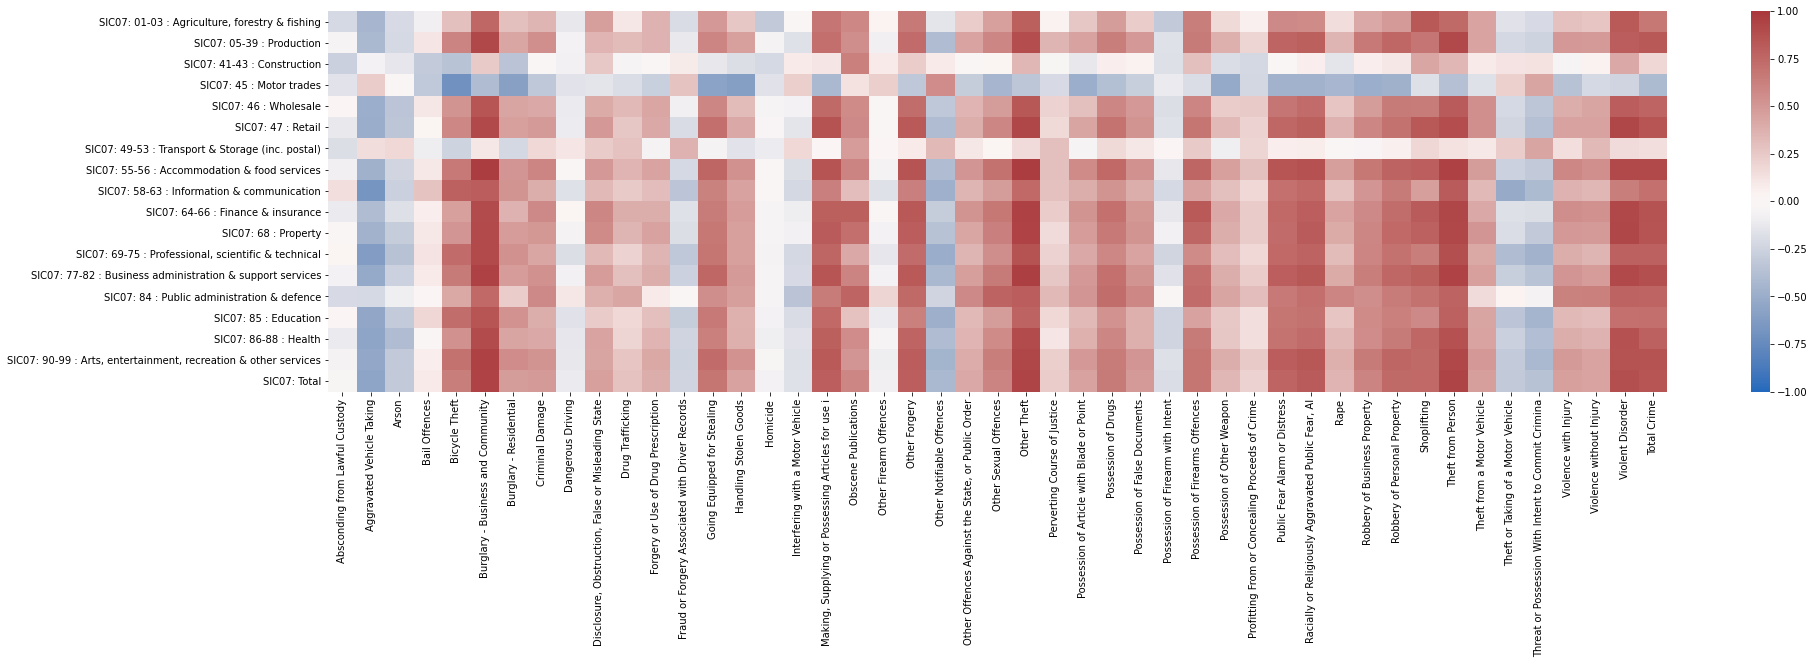

In [32]:
#in this palette stronger the colour the stronger the correlation, reds for positive, blue for negative


fig_dims = (30,7)
fig, ax = plt.subplots(figsize=fig_dims)

sn.color_palette("vlag", as_cmap=True)
sn.heatmap(heat_map_minor, annot=False, cmap="vlag", vmin=-1, vmax=1)

plt.show()

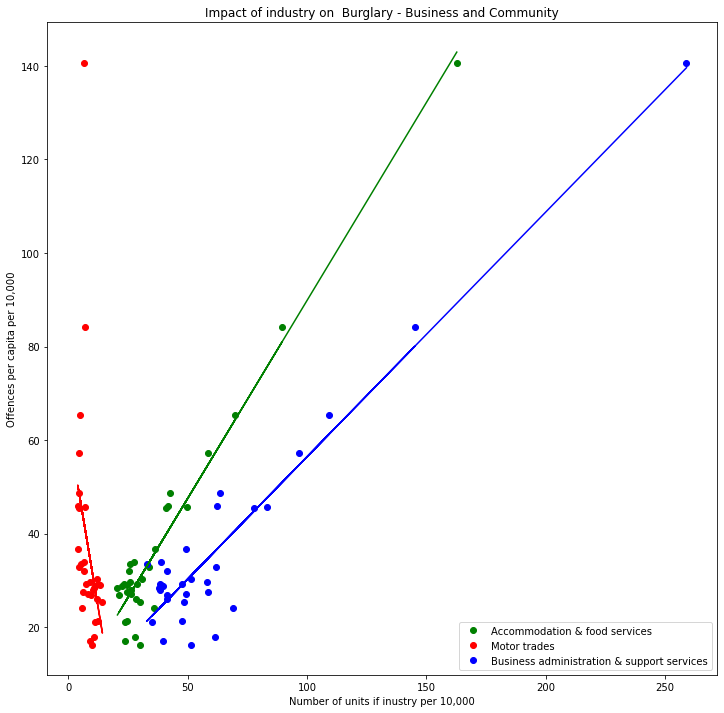

In [33]:
plt.rcParams["figure.figsize"] = (12,12)
plt.plot(adjMinorCrimeLocalUnits['SIC07: 55-56 : Accommodation & food services'],adjMinorCrimeLocalUnits['Burglary - Business and Community'],'o', color='green', label= "Accommodation & food services")
plt.plot(adjMinorCrimeLocalUnits['SIC07: 45 : Motor trades'],adjMinorCrimeLocalUnits['Burglary - Business and Community'],'o', color='red', label = "Motor trades")
plt.plot(adjMinorCrimeLocalUnits['SIC07: 77-82 : Business administration & support services'],adjMinorCrimeLocalUnits['Burglary - Business and Community'],'o', color='blue', label = "Business administration & support services")
plt.title("Impact of industry on  Burglary - Business and Community")
plt.xlabel("Number of units if inustry per 10,000")
plt.ylabel("Offences per capita per 10,000")
plt.legend()

x1=adjMinorCrimeLocalUnits['SIC07: 55-56 : Accommodation & food services']
x2=adjMinorCrimeLocalUnits['SIC07: 45 : Motor trades']
x3=adjMinorCrimeLocalUnits['SIC07: 77-82 : Business administration & support services']
y=adjMinorCrimeLocalUnits['Burglary - Business and Community']


m, b = np. polyfit(x1, y, 1) #m = slope, b = intercept.
plt.plot(x1, m*x1 + b, color='green') # add line of best fit.

m, b = np. polyfit(x2, y, 1) #m = slope, b = intercept.
plt.plot(x2, m*x2 + b, color='red') # add line of best fit.


m, b = np. polyfit(x3, y, 1) #m = slope, b = intercept.
plt.plot(x3, m*x3 + b, color='blue') # add line of best fit.


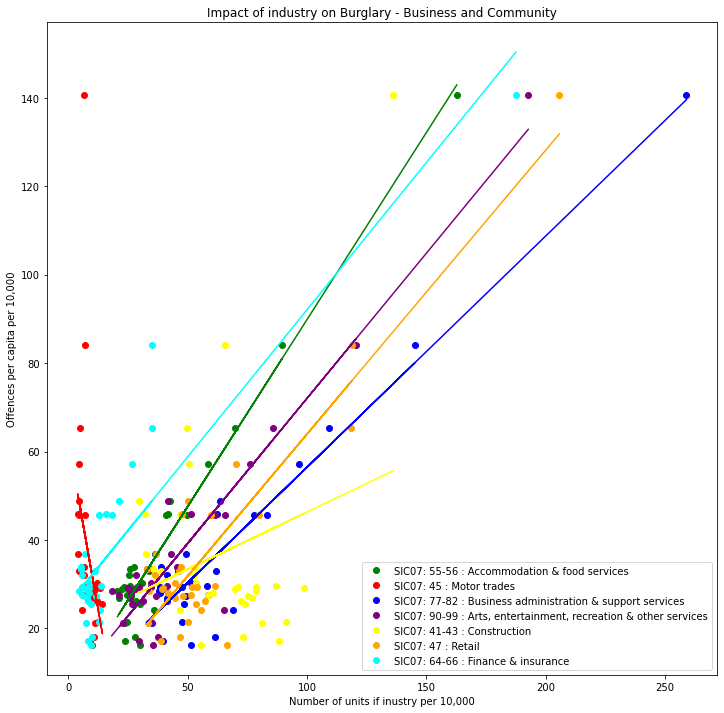

In [34]:
industry1 = 'SIC07: 55-56 : Accommodation & food services'
industry2 = 'SIC07: 45 : Motor trades'
industry3 = 'SIC07: 77-82 : Business administration & support services'
industry4 = 'SIC07: 90-99 : Arts, entertainment, recreation & other services'
industry5 = 'SIC07: 41-43 : Construction'
industry6 = 'SIC07: 47 : Retail'
industry7 = 'SIC07: 64-66 : Finance & insurance'
crime = 'Burglary - Business and Community'



plt.rcParams["figure.figsize"] = (12,12)
plt.plot(adjMinorCrimeLocalUnits[industry1],adjMinorCrimeLocalUnits[crime],'o', color='green', label= industry1)
plt.plot(adjMinorCrimeLocalUnits[industry2],adjMinorCrimeLocalUnits[crime],'o', color='red', label = industry2)
plt.plot(adjMinorCrimeLocalUnits[industry3],adjMinorCrimeLocalUnits[crime],'o', color='blue', label = industry3)
plt.plot(adjMinorCrimeLocalUnits[industry4],adjMinorCrimeLocalUnits[crime],'o', color='purple', label = industry4)
plt.plot(adjMinorCrimeLocalUnits[industry5],adjMinorCrimeLocalUnits[crime],'o', color='yellow', label = industry5)
plt.plot(adjMinorCrimeLocalUnits[industry6],adjMinorCrimeLocalUnits[crime],'o', color='orange', label = industry6)
plt.plot(adjMinorCrimeLocalUnits[industry7],adjMinorCrimeLocalUnits[crime],'o', color='cyan', label = industry7)
plt.title("Impact of industry on " + crime)
plt.xlabel("Number of units if inustry per 10,000")
plt.ylabel("Offences per capita per 10,000")
plt.legend()

x1=adjMinorCrimeLocalUnits[industry1]
x2=adjMinorCrimeLocalUnits[industry2]
x3=adjMinorCrimeLocalUnits[industry3]
x4=adjMinorCrimeLocalUnits[industry4]
x5=adjMinorCrimeLocalUnits[industry5]
x6=adjMinorCrimeLocalUnits[industry6]
x7=adjMinorCrimeLocalUnits[industry7]
y=adjMinorCrimeLocalUnits[crime]


m1, b = np. polyfit(x1, y, 1) #m = slope, b = intercept.
plt.plot(x1, m1*x1 + b, color='green') # add line of best fit.

m2, b = np. polyfit(x2, y, 1) #m = slope, b = intercept.
plt.plot(x2, m2*x2 + b, color='red') # add line of best fit.

m3, b = np. polyfit(x3, y, 1) #m = slope, b = intercept.
plt.plot(x3, m3*x3 + b, color='blue') # add line of best fit.

m4, b = np. polyfit(x4, y, 1) #m = slope, b = intercept.
plt.plot(x4, m4*x4 + b, color='purple') # add line of best fit.

m5, b = np. polyfit(x5, y, 1) #m = slope, b = intercept.
plt.plot(x5, m5*x5 + b, color='yellow') # add line of best fit.

m6, b = np. polyfit(x6, y, 1) #m = slope, b = intercept.
plt.plot(x6, m6*x6 + b, color='orange') # add line of best fit.

m7, b = np. polyfit(x7, y, 1) #m = slope, b = intercept.
plt.plot(x7, m7*x7 + b, color='cyan') # add line of best fit.



Recall the correlation scores

In [35]:
heat_map_minor.loc[[industry1, industry2, industry3, industry4, industry5, industry6, industry7], crime]

SIC07: 55-56 : Accommodation & food services                       0.972285
SIC07: 45 : Motor trades                                          -0.405015
SIC07: 77-82 : Business administration & support services          0.949021
SIC07: 90-99 : Arts, entertainment, recreation & other services    0.945863
SIC07: 41-43 : Construction                                        0.247229
SIC07: 47 : Retail                                                 0.909841
SIC07: 64-66 : Finance & insurance                                 0.896615
Name: Burglary - Business and Community, dtype: float64

Construction has no evidence of correlation.  Motor trades has limited evidence of negative correlation.  The other industries have strong positive correlation.  It can be seen from the graph that Accomodation and food services has the strongest impact on burglarly - business and community.  What this does not reveal is if the business itself is the victim of the crime, or there is a trend for unrelated units to be targetted.

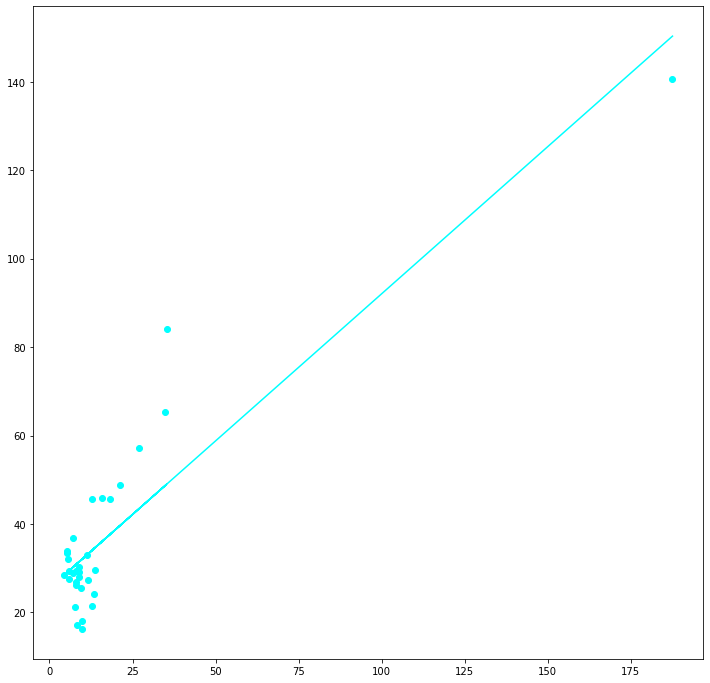

In [36]:

plt.plot(adjMinorCrimeLocalUnits[industry7],adjMinorCrimeLocalUnits[crime],'o', color='cyan', label = industry7)
m7, b = np. polyfit(x7, y, 1) #m = slope, b = intercept.
plt.plot(x7, m7*x7 + b, color='cyan') # add line of best fit.

Possibly linear is not the best fit, consider polynomial

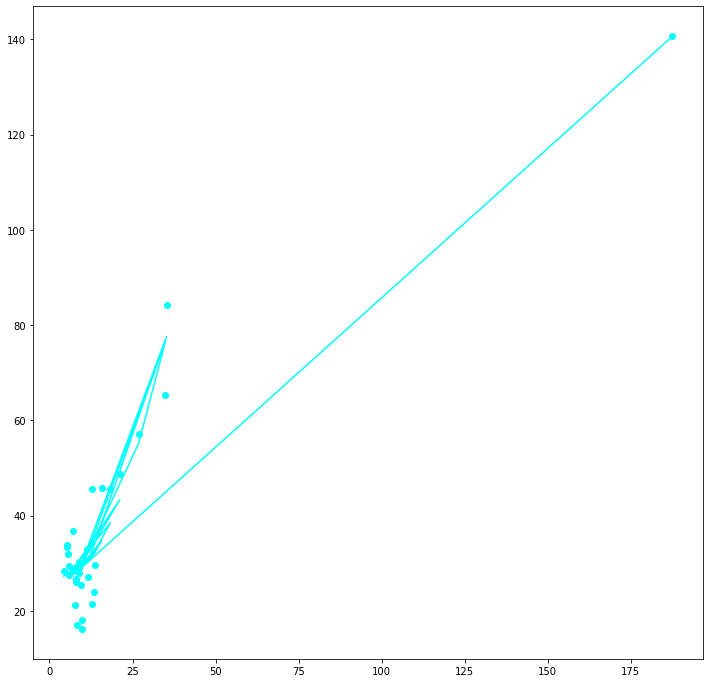

In [37]:

plt.plot(adjMinorCrimeLocalUnits[industry7],adjMinorCrimeLocalUnits[crime],'o', color='cyan', label = industry7)
m7 = np.polyfit(x7, y, 3) #m7 array of coeeficients

plt.plot(x7,m7[0]*np.power(x7,3)+m7[1]*np.power(x7,2)+m7[2]*x7+m7[3], color='cyan') # add line of best fit.

This not close - not pursuing  further as outside scope of this analysis, and time boxed

Now consider violent disorder - which also had strong correlation

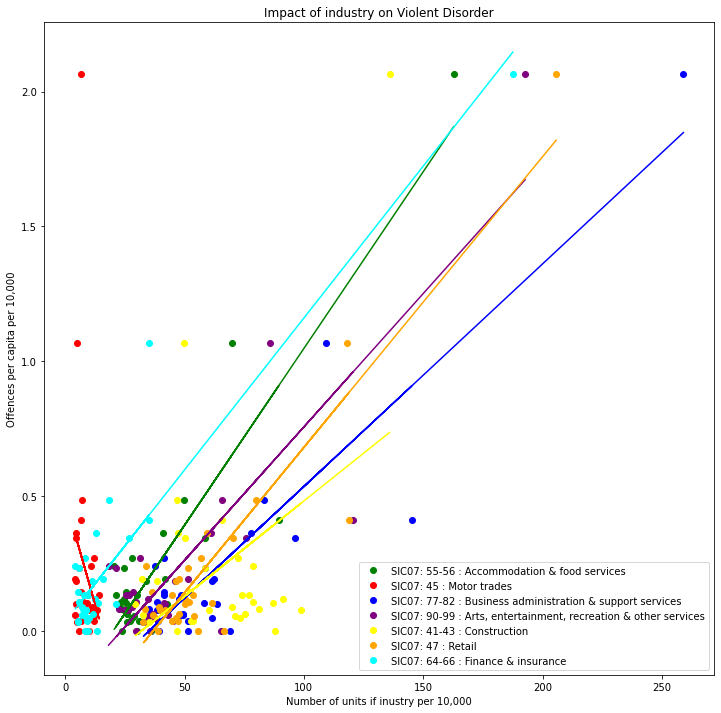

In [38]:
industry1 = 'SIC07: 55-56 : Accommodation & food services'
industry2 = 'SIC07: 45 : Motor trades'
industry3 = 'SIC07: 77-82 : Business administration & support services'
industry4 = 'SIC07: 90-99 : Arts, entertainment, recreation & other services'
industry5 = 'SIC07: 41-43 : Construction'
industry6 = 'SIC07: 47 : Retail'
industry7 = 'SIC07: 64-66 : Finance & insurance'
crime = 'Violent Disorder'

plt.rcParams["figure.figsize"] = (12,12)
plt.plot(adjMinorCrimeLocalUnits[industry1],adjMinorCrimeLocalUnits[crime],'o', color='green', label= industry1)
plt.plot(adjMinorCrimeLocalUnits[industry2],adjMinorCrimeLocalUnits[crime],'o', color='red', label = industry2)
plt.plot(adjMinorCrimeLocalUnits[industry3],adjMinorCrimeLocalUnits[crime],'o', color='blue', label = industry3)
plt.plot(adjMinorCrimeLocalUnits[industry4],adjMinorCrimeLocalUnits[crime],'o', color='purple', label = industry4)
plt.plot(adjMinorCrimeLocalUnits[industry5],adjMinorCrimeLocalUnits[crime],'o', color='yellow', label = industry5)
plt.plot(adjMinorCrimeLocalUnits[industry6],adjMinorCrimeLocalUnits[crime],'o', color='orange', label = industry6)
plt.plot(adjMinorCrimeLocalUnits[industry7],adjMinorCrimeLocalUnits[crime],'o', color='cyan', label = industry7)
plt.title("Impact of industry on " + crime)
plt.xlabel("Number of units if inustry per 10,000")
plt.ylabel("Offences per capita per 10,000")
plt.legend()

#calculate and plot simple lines of best fit
x1=adjMinorCrimeLocalUnits[industry1]
x2=adjMinorCrimeLocalUnits[industry2]
x3=adjMinorCrimeLocalUnits[industry3]
x4=adjMinorCrimeLocalUnits[industry4]
x5=adjMinorCrimeLocalUnits[industry5]
x6=adjMinorCrimeLocalUnits[industry6]
x7=adjMinorCrimeLocalUnits[industry7]
y=adjMinorCrimeLocalUnits[crime]

m1, b = np. polyfit(x1, y, 1) #m = slope, b = intercept.
plt.plot(x1, m1*x1 + b, color='green') # add line of best fit.

m2, b = np. polyfit(x2, y, 1) #m = slope, b = intercept.
plt.plot(x2, m2*x2 + b, color='red') # add line of best fit.

m3, b = np. polyfit(x3, y, 1) #m = slope, b = intercept.
plt.plot(x3, m3*x3 + b, color='blue') # add line of best fit.

m4, b = np. polyfit(x4, y, 1) #m = slope, b = intercept.
plt.plot(x4, m4*x4 + b, color='purple') # add line of best fit.

m5, b = np. polyfit(x5, y, 1) #m = slope, b = intercept.
plt.plot(x5, m5*x5 + b, color='yellow') # add line of best fit.

m6, b = np. polyfit(x6, y, 1) #m = slope, b = intercept.
plt.plot(x6, m6*x6 + b, color='orange') # add line of best fit.

m7, b = np. polyfit(x7, y, 1) #m = slope, b = intercept.
plt.plot(x7, m7*x7 + b, color='cyan') # add line of best fit.


In [39]:
heat_map_minor.loc[[industry1, industry2, industry3, industry4, industry5, industry6, industry7], crime]

SIC07: 55-56 : Accommodation & food services                       0.912248
SIC07: 45 : Motor trades                                          -0.248662
SIC07: 77-82 : Business administration & support services          0.906996
SIC07: 90-99 : Arts, entertainment, recreation & other services    0.863086
SIC07: 41-43 : Construction                                        0.409339
SIC07: 47 : Retail                                                 0.924574
SIC07: 64-66 : Finance & insurance                                 0.918649
Name: Violent Disorder, dtype: float64

Limit to strong correlations for final report

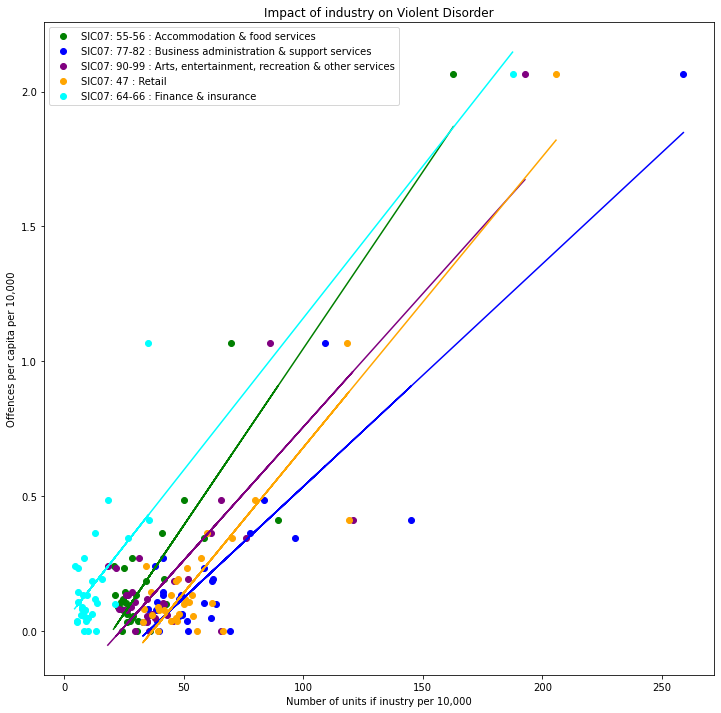

In [40]:
industry1 = 'SIC07: 55-56 : Accommodation & food services'
industry2 = 'SIC07: 45 : Motor trades'
industry3 = 'SIC07: 77-82 : Business administration & support services'
industry4 = 'SIC07: 90-99 : Arts, entertainment, recreation & other services'
industry5 = 'SIC07: 41-43 : Construction'
industry6 = 'SIC07: 47 : Retail'
industry7 = 'SIC07: 64-66 : Finance & insurance'
crime = 'Violent Disorder'

plt.rcParams["figure.figsize"] = (12,12)
plt.plot(adjMinorCrimeLocalUnits[industry1],adjMinorCrimeLocalUnits[crime],'o', color='green', label= industry1)
#plt.plot(adjMinorCrimeLocalUnits[industry2],adjMinorCrimeLocalUnits[crime],'o', color='red', label = industry2)
plt.plot(adjMinorCrimeLocalUnits[industry3],adjMinorCrimeLocalUnits[crime],'o', color='blue', label = industry3)
plt.plot(adjMinorCrimeLocalUnits[industry4],adjMinorCrimeLocalUnits[crime],'o', color='purple', label = industry4)
#plt.plot(adjMinorCrimeLocalUnits[industry5],adjMinorCrimeLocalUnits[crime],'o', color='yellow', label = industry5)
plt.plot(adjMinorCrimeLocalUnits[industry6],adjMinorCrimeLocalUnits[crime],'o', color='orange', label = industry6)
plt.plot(adjMinorCrimeLocalUnits[industry7],adjMinorCrimeLocalUnits[crime],'o', color='cyan', label = industry7)
plt.title("Impact of industry on " + crime)
plt.xlabel("Number of units if inustry per 10,000")
plt.ylabel("Offences per capita per 10,000")
plt.legend()

#calculate and plot simple lines of best fit
x1=adjMinorCrimeLocalUnits[industry1]
x2=adjMinorCrimeLocalUnits[industry2]
x3=adjMinorCrimeLocalUnits[industry3]
x4=adjMinorCrimeLocalUnits[industry4]
x5=adjMinorCrimeLocalUnits[industry5]
x6=adjMinorCrimeLocalUnits[industry6]
x7=adjMinorCrimeLocalUnits[industry7]
y=adjMinorCrimeLocalUnits[crime]

m1, b = np. polyfit(x1, y, 1) #m = slope, b = intercept.
plt.plot(x1, m1*x1 + b, color='green') # add line of best fit.

m2, b = np. polyfit(x2, y, 1) #m = slope, b = intercept.
#plt.plot(x2, m2*x2 + b, color='red') # add line of best fit.

m3, b = np. polyfit(x3, y, 1) #m = slope, b = intercept.
plt.plot(x3, m3*x3 + b, color='blue') # add line of best fit.

m4, b = np. polyfit(x4, y, 1) #m = slope, b = intercept.
plt.plot(x4, m4*x4 + b, color='purple') # add line of best fit.

m5, b = np. polyfit(x5, y, 1) #m = slope, b = intercept.
#plt.plot(x5, m5*x5 + b, color='yellow') # add line of best fit.

m6, b = np. polyfit(x6, y, 1) #m = slope, b = intercept.
plt.plot(x6, m6*x6 + b, color='orange') # add line of best fit.

m7, b = np. polyfit(x7, y, 1) #m = slope, b = intercept.
plt.plot(x7, m7*x7 + b, color='cyan') # add line of best fit.


Look at obscene publications

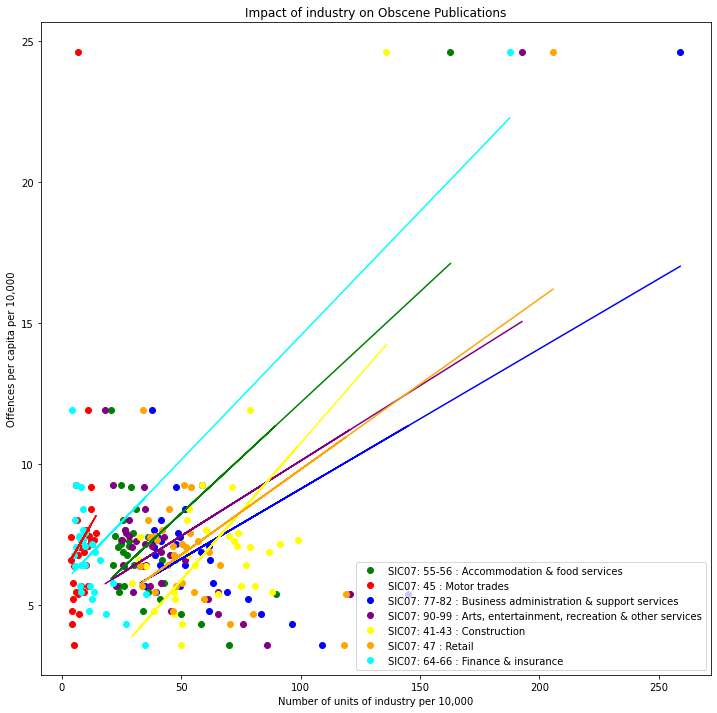

In [41]:
industry1 = 'SIC07: 55-56 : Accommodation & food services'
industry2 = 'SIC07: 45 : Motor trades'
industry3 = 'SIC07: 77-82 : Business administration & support services'
industry4 = 'SIC07: 90-99 : Arts, entertainment, recreation & other services'
industry5 = 'SIC07: 41-43 : Construction'
industry6 = 'SIC07: 47 : Retail'
industry7 = 'SIC07: 64-66 : Finance & insurance'
crime = 'Obscene Publications'

plt.rcParams["figure.figsize"] = (12,12)
plt.plot(adjMinorCrimeLocalUnits[industry1],adjMinorCrimeLocalUnits[crime],'o', color='green', label= industry1)
plt.plot(adjMinorCrimeLocalUnits[industry2],adjMinorCrimeLocalUnits[crime],'o', color='red', label = industry2)
plt.plot(adjMinorCrimeLocalUnits[industry3],adjMinorCrimeLocalUnits[crime],'o', color='blue', label = industry3)
plt.plot(adjMinorCrimeLocalUnits[industry4],adjMinorCrimeLocalUnits[crime],'o', color='purple', label = industry4)
plt.plot(adjMinorCrimeLocalUnits[industry5],adjMinorCrimeLocalUnits[crime],'o', color='yellow', label = industry5)
plt.plot(adjMinorCrimeLocalUnits[industry6],adjMinorCrimeLocalUnits[crime],'o', color='orange', label = industry6)
plt.plot(adjMinorCrimeLocalUnits[industry7],adjMinorCrimeLocalUnits[crime],'o', color='cyan', label = industry7)
plt.title("Impact of industry on " + crime)
plt.xlabel("Number of units of industry per 10,000")
plt.ylabel("Offences per capita per 10,000")
plt.legend()

#calculate and plot simple lines of best fit
x1=adjMinorCrimeLocalUnits[industry1]
x2=adjMinorCrimeLocalUnits[industry2]
x3=adjMinorCrimeLocalUnits[industry3]
x4=adjMinorCrimeLocalUnits[industry4]
x5=adjMinorCrimeLocalUnits[industry5]
x6=adjMinorCrimeLocalUnits[industry6]
x7=adjMinorCrimeLocalUnits[industry7]
y=adjMinorCrimeLocalUnits[crime]

m1, b = np. polyfit(x1, y, 1) #m = slope, b = intercept.
plt.plot(x1, m1*x1 + b, color='green') # add line of best fit.

m2, b = np. polyfit(x2, y, 1) #m = slope, b = intercept.
plt.plot(x2, m2*x2 + b, color='red') # add line of best fit.

m3, b = np. polyfit(x3, y, 1) #m = slope, b = intercept.
plt.plot(x3, m3*x3 + b, color='blue') # add line of best fit.

m4, b = np. polyfit(x4, y, 1) #m = slope, b = intercept.
plt.plot(x4, m4*x4 + b, color='purple') # add line of best fit.

m5, b = np. polyfit(x5, y, 1) #m = slope, b = intercept.
plt.plot(x5, m5*x5 + b, color='yellow') # add line of best fit.

m6, b = np. polyfit(x6, y, 1) #m = slope, b = intercept.
plt.plot(x6, m6*x6 + b, color='orange') # add line of best fit.

m7, b = np. polyfit(x7, y, 1) #m = slope, b = intercept.
plt.plot(x7, m7*x7 + b, color='cyan') # add line of best fit.


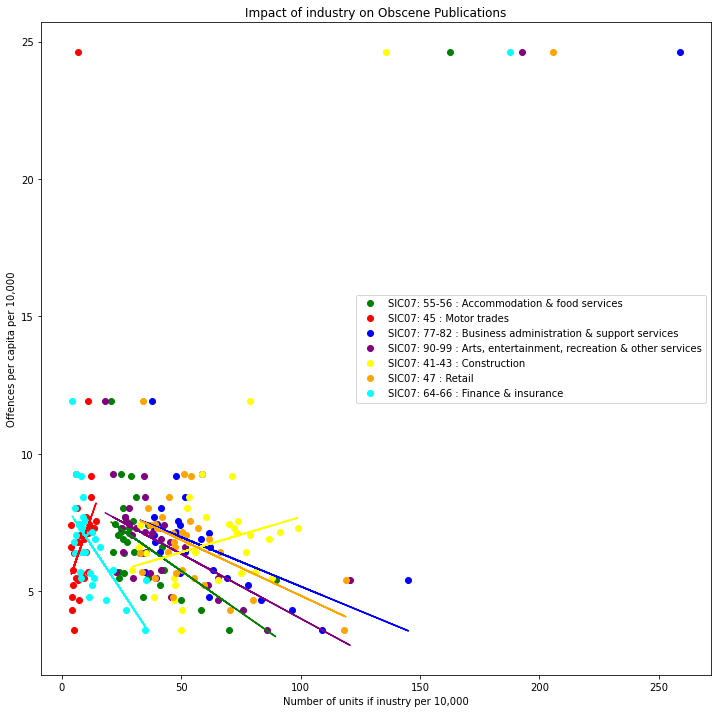

In [42]:
industry1 = 'SIC07: 55-56 : Accommodation & food services'
industry2 = 'SIC07: 45 : Motor trades'
industry3 = 'SIC07: 77-82 : Business administration & support services'
industry4 = 'SIC07: 90-99 : Arts, entertainment, recreation & other services'
industry5 = 'SIC07: 41-43 : Construction'
industry6 = 'SIC07: 47 : Retail'
industry7 = 'SIC07: 64-66 : Finance & insurance'
crime = 'Obscene Publications'

plotData = adjMinorCrimeLocalUnits.drop('Westminster', axis=0)

plt.rcParams["figure.figsize"] = (12,12)
plt.plot(adjMinorCrimeLocalUnits[industry1],adjMinorCrimeLocalUnits[crime],'o', color='green', label= industry1)
plt.plot(adjMinorCrimeLocalUnits[industry2],adjMinorCrimeLocalUnits[crime],'o', color='red', label = industry2)
plt.plot(adjMinorCrimeLocalUnits[industry3],adjMinorCrimeLocalUnits[crime],'o', color='blue', label = industry3)
plt.plot(adjMinorCrimeLocalUnits[industry4],adjMinorCrimeLocalUnits[crime],'o', color='purple', label = industry4)
plt.plot(adjMinorCrimeLocalUnits[industry5],adjMinorCrimeLocalUnits[crime],'o', color='yellow', label = industry5)
plt.plot(adjMinorCrimeLocalUnits[industry6],adjMinorCrimeLocalUnits[crime],'o', color='orange', label = industry6)
plt.plot(adjMinorCrimeLocalUnits[industry7],adjMinorCrimeLocalUnits[crime],'o', color='cyan', label = industry7)
plt.title("Impact of industry on " + crime)
plt.xlabel("Number of units if inustry per 10,000")
plt.ylabel("Offences per capita per 10,000")
plt.legend()

#calculate and plot simple lines of best fit
x1=plotData[industry1]
x2=plotData[industry2]
x3=plotData[industry3]
x4=plotData[industry4]
x5=plotData[industry5]
x6=plotData[industry6]
x7=plotData[industry7]
y=plotData[crime]

m1, b = np. polyfit(x1, y, 1) #m = slope, b = intercept.
plt.plot(x1, m1*x1 + b, color='green') # add line of best fit.

m2, b = np. polyfit(x2, y, 1) #m = slope, b = intercept.
plt.plot(x2, m2*x2 + b, color='red') # add line of best fit.

m3, b = np. polyfit(x3, y, 1) #m = slope, b = intercept.
plt.plot(x3, m3*x3 + b, color='blue') # add line of best fit.

m4, b = np. polyfit(x4, y, 1) #m = slope, b = intercept.
plt.plot(x4, m4*x4 + b, color='purple') # add line of best fit.

m5, b = np. polyfit(x5, y, 1) #m = slope, b = intercept.
plt.plot(x5, m5*x5 + b, color='yellow') # add line of best fit.

m6, b = np. polyfit(x6, y, 1) #m = slope, b = intercept.
plt.plot(x6, m6*x6 + b, color='orange') # add line of best fit.

m7, b = np. polyfit(x7, y, 1) #m = slope, b = intercept.
plt.plot(x7, m7*x7 + b, color='cyan') # add line of best fit.

Removing Westminster has a profound impact on the best fit line - changing many industries from positive correlation to negative.  
Rerun correlation without Westminster



In [43]:

#pull out the data we are interested in - impact of venues on crimes
heat_map_minor_no_outlier =adjMinorCrimeLocalUnits.drop('Westminster', axis=0).corr().loc[ adjLocalUnits.columns,adjCrimeByBoroughMinor.columns]
heat_map_minor_no_outlier.dropna(axis=1, inplace=True)
heat_map_minor_no_outlier

,Absconding from Lawful Custody,Aggravated Vehicle Taking,Arson,Bail Offences,Bicycle Theft,Burglary - Business and Community,Burglary - Residential,Criminal Damage,Dangerous Driving,"Disclosure, Obstruction, False or Misleading State",...,Robbery of Personal Property,Shoplifting,Theft from Person,Theft from a Motor Vehicle,Theft or Taking of a Motor Vehicle,Threat or Possession With Intent to Commit Crimina,Violence with Injury,Violence without Injury,Violent Disorder,Total Crime
"SIC07: 01-03 : Agriculture, forestry & fishing",-0.183955,-0.383176,-0.215518,-0.169058,0.098942,0.315146,0.176435,-0.218571,-0.258870,-0.023258,...,-0.121404,0.572307,0.137660,0.308027,-0.132547,-0.264708,-0.309936,-0.330575,0.441124,0.063391
SIC07: 05-39 : Production,0.073611,-0.325816,-0.214138,0.151371,0.594913,0.805857,0.372356,0.212337,-0.139605,-0.162711,...,0.506415,0.248769,0.792743,0.300808,-0.219776,-0.305255,0.143379,0.145202,0.488077,0.588844
SIC07: 41-43 : Construction,-0.236929,0.121203,-0.099858,-0.386980,-0.684384,-0.423476,-0.618665,-0.498060,-0.110067,-0.136660,...,-0.462277,-0.027251,-0.381119,-0.134390,0.224704,0.204974,-0.546016,-0.394646,-0.190199,-0.560130
SIC07: 45 : Motor trades,-0.168453,0.211557,-0.031410,-0.316578,-0.702826,-0.541869,-0.592617,-0.327401,-0.150826,-0.108139,...,-0.556144,-0.161213,-0.560285,-0.140073,0.205196,0.431557,-0.369410,-0.189694,-0.317531,-0.559880
SIC07: 46 : Wholesale,0.164105,-0.445467,-0.389735,0.129582,0.451245,0.637043,0.382797,-0.011566,-0.196966,-0.062136,...,0.323700,0.199542,0.548644,0.468426,-0.200977,-0.416374,-0.032121,0.070866,0.519971,0.445548
SIC07: 47 : Retail,-0.024586,-0.486394,-0.417569,0.006955,0.580358,0.752347,0.454307,0.060716,-0.212341,0.045906,...,0.367620,0.560360,0.650773,0.493364,-0.263131,-0.527519,0.011064,0.026085,0.773693,0.570375
SIC07: 49-53 : Transport & Storage (inc. postal),-0.157924,0.231896,0.203491,-0.107929,-0.358488,-0.146740,-0.295617,0.045015,0.105038,0.116834,...,-0.150468,-0.002522,-0.157602,0.021250,0.262293,0.467592,0.011647,0.237953,-0.084394,-0.082162
SIC07: 55-56 : Accommodation & food services,0.051163,-0.459628,-0.288114,0.152878,0.772100,0.924085,0.580973,0.275486,-0.081898,0.003881,...,0.519053,0.440007,0.819512,0.369054,-0.317537,-0.468860,0.247958,0.185325,0.695230,0.728731
SIC07: 58-63 : Information & communication,0.271267,-0.652893,-0.262975,0.328675,0.775523,0.713678,0.482064,0.094398,-0.229673,-0.016709,...,0.436751,0.043830,0.766097,0.175351,-0.561420,-0.453368,0.067522,0.037528,0.342113,0.503594
SIC07: 64-66 : Finance & insurance,0.072171,-0.564807,-0.328149,0.195794,0.672218,0.849090,0.546839,0.098934,-0.045045,0.058952,...,0.386432,0.445900,0.704316,0.388762,-0.319485,-0.498612,0.055241,0.021979,0.717891,0.589212


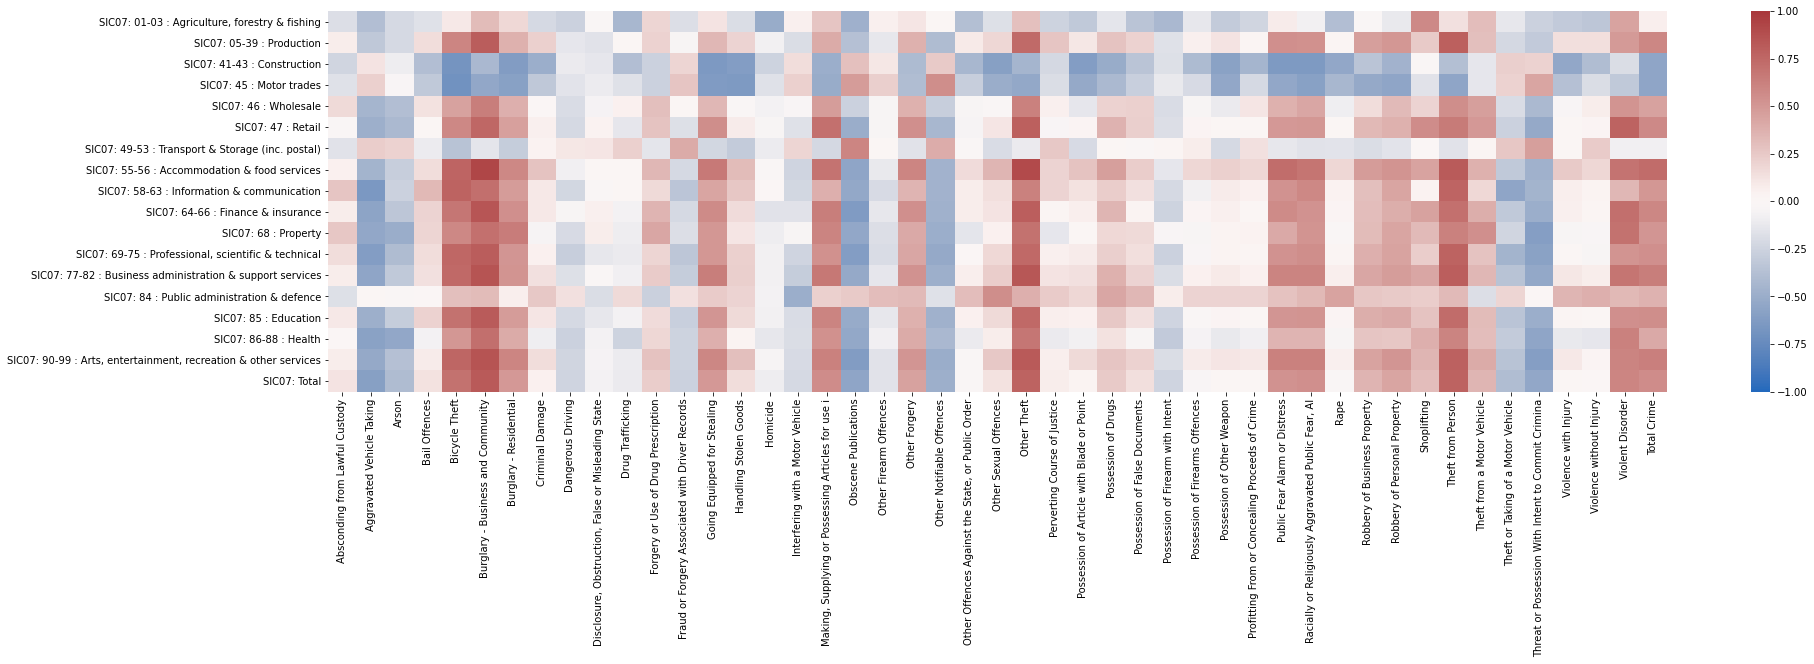

In [44]:
#in this palette stronger the colour the stronger the correlation, reds for positive, blue for negative


fig_dims = (30,7)
fig, ax = plt.subplots(figsize=fig_dims)

sn.color_palette("vlag", as_cmap=True)
sn.heatmap(heat_map_minor_no_outlier, annot=False, cmap="vlag", vmin=-1, vmax=1)

plt.show()

This shows the following crimes to have strong positive correlation to the presence of industry (in general)
- Bicycle Theft
- Burglary Business and Community
- Burglary Residential
- Other Theft
- Theft from person

To further analyse this pull out only the crimes which have evidence of strong correlation - ie those with a a value or 0.7 and above, or -0.7 and below. Make this into a reduced heat map


In [45]:
colsStrongPos = heat_map_minor_no_outlier[heat_map_minor_no_outlier>0.7].dropna(how='all', axis=1).columns
colsStrongNeg = heat_map_minor_no_outlier[heat_map_minor_no_outlier<-0.7].dropna(how='all', axis=1).columns

heat_map_minor_no_outlier[list(set(list(colsStrongPos) +list(colsStrongNeg))) ] # combine lists but convert to set and back to remove duplicates

,Other Theft,"Making, Supplying or Possessing Articles for use i",Burglary - Business and Community,Violent Disorder,Bicycle Theft,Public Fear Alarm or Distress,Theft from Person,Total Crime
"SIC07: 01-03 : Agriculture, forestry & fishing",0.289305,0.266154,0.315146,0.441124,0.098942,0.081285,0.137660,0.063391
SIC07: 05-39 : Production,0.737826,0.403291,0.805857,0.488077,0.594913,0.540948,0.792743,0.588844
SIC07: 41-43 : Construction,-0.452349,-0.494873,-0.423476,-0.190199,-0.684384,-0.636305,-0.381119,-0.560130
SIC07: 45 : Motor trades,-0.531613,-0.508194,-0.541869,-0.317531,-0.702826,-0.542732,-0.560285,-0.559880
SIC07: 46 : Wholesale,0.620152,0.472311,0.637043,0.519971,0.451245,0.370056,0.548644,0.445548
SIC07: 47 : Retail,0.793997,0.706232,0.752347,0.773693,0.580358,0.499169,0.650773,0.570375
SIC07: 49-53 : Transport & Storage (inc. postal),-0.111123,-0.223171,-0.146740,-0.084394,-0.358488,-0.129121,-0.157602,-0.082162
SIC07: 55-56 : Accommodation & food services,0.905462,0.694374,0.924085,0.695230,0.772100,0.719153,0.819512,0.728731
SIC07: 58-63 : Information & communication,0.623975,0.382049,0.713678,0.342113,0.775523,0.525526,0.766097,0.503594
SIC07: 64-66 : Finance & insurance,0.799198,0.635336,0.849090,0.717891,0.672218,0.562812,0.704316,0.589212


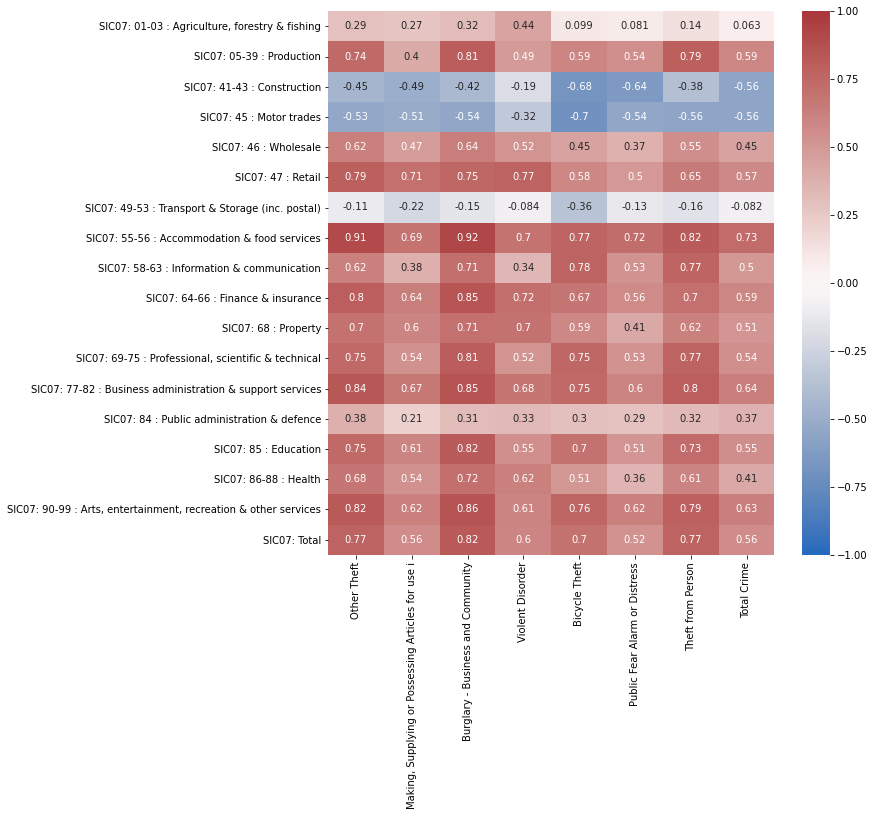

In [46]:
#in this palette stronger the colour the stronger the correlation, reds for positive, blue for negative


fig_dims = (10,10)
fig, ax = plt.subplots(figsize=fig_dims)

sn.color_palette("vlag", as_cmap=True)
sn.heatmap(heat_map_minor_no_outlier[list(set(list(colsStrongPos) +list(colsStrongNeg))) ] , annot=True, cmap="vlag", vmin=-1, vmax=1)

plt.show()

The only strong negative correlation is Bicylce theft, so let's look at this in more detail

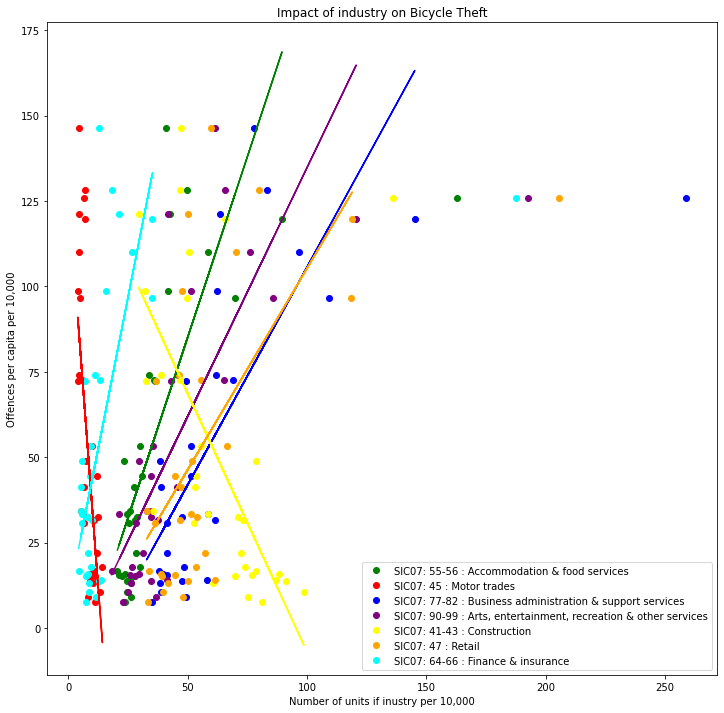

In [47]:
industry1 = 'SIC07: 55-56 : Accommodation & food services'
industry2 = 'SIC07: 45 : Motor trades'
industry3 = 'SIC07: 77-82 : Business administration & support services'
industry4 = 'SIC07: 90-99 : Arts, entertainment, recreation & other services'
industry5 = 'SIC07: 41-43 : Construction'
industry6 = 'SIC07: 47 : Retail'
industry7 = 'SIC07: 64-66 : Finance & insurance'
crime = 'Bicycle Theft'

plotData = adjMinorCrimeLocalUnits.drop('Westminster', axis=0)

plt.rcParams["figure.figsize"] = (12,12)
plt.plot(adjMinorCrimeLocalUnits[industry1],adjMinorCrimeLocalUnits[crime],'o', color='green', label= industry1)
plt.plot(adjMinorCrimeLocalUnits[industry2],adjMinorCrimeLocalUnits[crime],'o', color='red', label = industry2)
plt.plot(adjMinorCrimeLocalUnits[industry3],adjMinorCrimeLocalUnits[crime],'o', color='blue', label = industry3)
plt.plot(adjMinorCrimeLocalUnits[industry4],adjMinorCrimeLocalUnits[crime],'o', color='purple', label = industry4)
plt.plot(adjMinorCrimeLocalUnits[industry5],adjMinorCrimeLocalUnits[crime],'o', color='yellow', label = industry5)
plt.plot(adjMinorCrimeLocalUnits[industry6],adjMinorCrimeLocalUnits[crime],'o', color='orange', label = industry6)
plt.plot(adjMinorCrimeLocalUnits[industry7],adjMinorCrimeLocalUnits[crime],'o', color='cyan', label = industry7)
plt.title("Impact of industry on " + crime)
plt.xlabel("Number of units if inustry per 10,000")
plt.ylabel("Offences per capita per 10,000")
plt.legend()

#calculate and plot simple lines of best fit
x1=plotData[industry1]
x2=plotData[industry2]
x3=plotData[industry3]
x4=plotData[industry4]
x5=plotData[industry5]
x6=plotData[industry6]
x7=plotData[industry7]
y=plotData[crime]

m1, b = np. polyfit(x1, y, 1) #m = slope, b = intercept.
plt.plot(x1, m1*x1 + b, color='green') # add line of best fit.

m2, b = np. polyfit(x2, y, 1) #m = slope, b = intercept.
plt.plot(x2, m2*x2 + b, color='red') # add line of best fit.

m3, b = np. polyfit(x3, y, 1) #m = slope, b = intercept.
plt.plot(x3, m3*x3 + b, color='blue') # add line of best fit.

m4, b = np. polyfit(x4, y, 1) #m = slope, b = intercept.
plt.plot(x4, m4*x4 + b, color='purple') # add line of best fit.

m5, b = np. polyfit(x5, y, 1) #m = slope, b = intercept.
plt.plot(x5, m5*x5 + b, color='yellow') # add line of best fit.

m6, b = np. polyfit(x6, y, 1) #m = slope, b = intercept.
plt.plot(x6, m6*x6 + b, color='orange') # add line of best fit.

m7, b = np. polyfit(x7, y, 1) #m = slope, b = intercept.
plt.plot(x7, m7*x7 + b, color='cyan') # add line of best fit.

Reduce plot for clearer analysis in final report

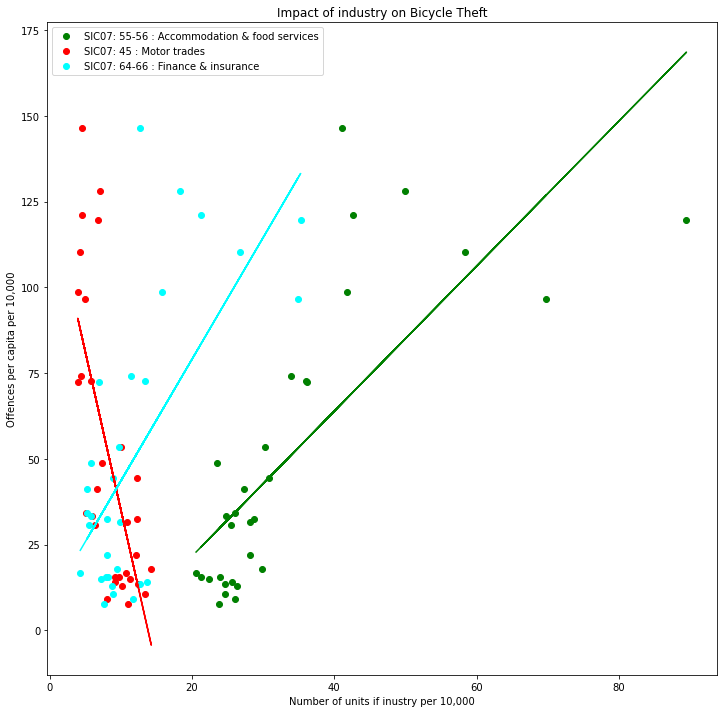

In [48]:
industry1 = 'SIC07: 55-56 : Accommodation & food services'
industry2 = 'SIC07: 45 : Motor trades'
industry3 = 'SIC07: 77-82 : Business administration & support services'
industry4 = 'SIC07: 90-99 : Arts, entertainment, recreation & other services'
industry5 = 'SIC07: 41-43 : Construction'
industry6 = 'SIC07: 47 : Retail'
industry7 = 'SIC07: 64-66 : Finance & insurance'
crime = 'Bicycle Theft'

plotData = adjMinorCrimeLocalUnits.drop('Westminster', axis=0)

plt.rcParams["figure.figsize"] = (12,12)
plt.plot(plotData[industry1],plotData[crime],'o', color='green', label= industry1)
plt.plot(plotData[industry2],plotData[crime],'o', color='red', label = industry2)
#plt.plot(plotData[industry3],plotData[crime],'o', color='blue', label = industry3)
#plt.plot(plotData[industry4],plotData[crime],'o', color='purple', label = industry4)
#plt.plot(plotData[industry5],plotData[crime],'o', color='yellow', label = industry5)
#plt.plot(plotData[industry6],plotData[crime],'o', color='orange', label = industry6)
plt.plot(plotData[industry7],plotData[crime],'o', color='cyan', label = industry7)
plt.title("Impact of industry on " + crime)
plt.xlabel("Number of units if inustry per 10,000")
plt.ylabel("Offences per capita per 10,000")
plt.legend()

#calculate and plot simple lines of best fit
x1=plotData[industry1]
x2=plotData[industry2]
x3=plotData[industry3]
x4=plotData[industry4]
x5=plotData[industry5]
x6=plotData[industry6]
x7=plotData[industry7]
y=plotData[crime]

m1, b = np. polyfit(x1, y, 1) #m = slope, b = intercept.
plt.plot(x1, m1*x1 + b, color='green') # add line of best fit.

m2, b = np. polyfit(x2, y, 1) #m = slope, b = intercept.
plt.plot(x2, m2*x2 + b, color='red') # add line of best fit.

m3, b = np. polyfit(x3, y, 1) #m = slope, b = intercept.
#plt.plot(x3, m3*x3 + b, color='blue') # add line of best fit.

m4, b = np. polyfit(x4, y, 1) #m = slope, b = intercept.
#plt.plot(x4, m4*x4 + b, color='purple') # add line of best fit.

m5, b = np. polyfit(x5, y, 1) #m = slope, b = intercept.
#plt.plot(x5, m5*x5 + b, color='yellow') # add line of best fit.

m6, b = np. polyfit(x6, y, 1) #m = slope, b = intercept.
#plt.plot(x6, m6*x6 + b, color='orange') # add line of best fit.

m7, b = np. polyfit(x7, y, 1) #m = slope, b = intercept.
plt.plot(x7, m7*x7 + b, color='cyan') # add line of best fit.

Let's look at burglary - business or commercial, against the most correlated industries

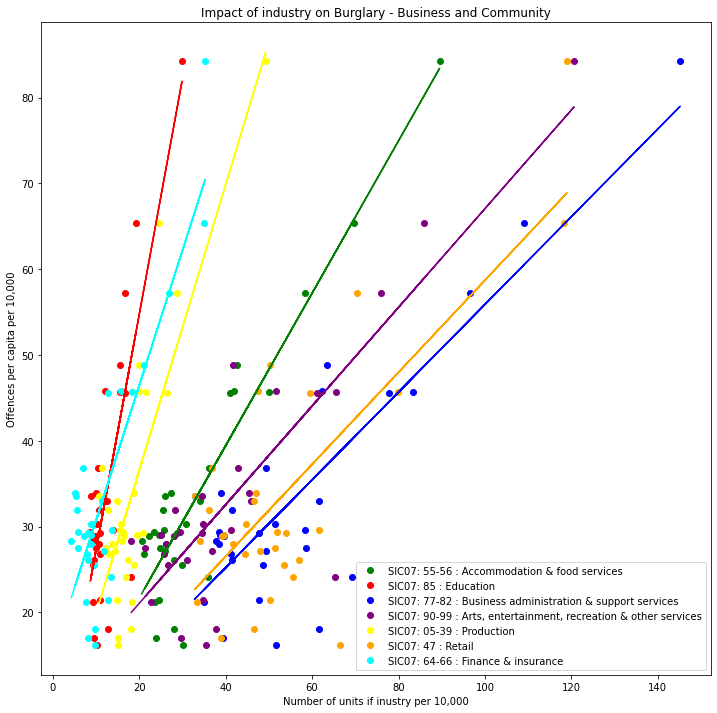

In [49]:
industry1 = 'SIC07: 55-56 : Accommodation & food services'
industry2 = 'SIC07: 85 : Education'
industry3 = 'SIC07: 77-82 : Business administration & support services'
industry4 = 'SIC07: 90-99 : Arts, entertainment, recreation & other services'
industry5 = 'SIC07: 05-39 : Production'
industry6 = 'SIC07: 47 : Retail'
industry7 = 'SIC07: 64-66 : Finance & insurance'
crime = 'Burglary - Business and Community'

plotData = adjMinorCrimeLocalUnits.drop('Westminster', axis=0)

plt.rcParams["figure.figsize"] = (12,12)
plt.plot(plotData[industry1],plotData[crime],'o', color='green', label= industry1)
plt.plot(plotData[industry2],plotData[crime],'o', color='red', label = industry2)
plt.plot(plotData[industry3],plotData[crime],'o', color='blue', label = industry3)
plt.plot(plotData[industry4],plotData[crime],'o', color='purple', label = industry4)
plt.plot(plotData[industry5],plotData[crime],'o', color='yellow', label = industry5)
plt.plot(plotData[industry6],plotData[crime],'o', color='orange', label = industry6)
plt.plot(plotData[industry7],plotData[crime],'o', color='cyan', label = industry7)
plt.title("Impact of industry on " + crime)
plt.xlabel("Number of units if inustry per 10,000")
plt.ylabel("Offences per capita per 10,000")
plt.legend()

#calculate and plot simple lines of best fit
x1=plotData[industry1]
x2=plotData[industry2]
x3=plotData[industry3]
x4=plotData[industry4]
x5=plotData[industry5]
x6=plotData[industry6]
x7=plotData[industry7]
y=plotData[crime]

m1, b = np. polyfit(x1, y, 1) #m = slope, b = intercept.
plt.plot(x1, m1*x1 + b, color='green') # add line of best fit.

m2, b = np. polyfit(x2, y, 1) #m = slope, b = intercept.
plt.plot(x2, m2*x2 + b, color='red') # add line of best fit.

m3, b = np. polyfit(x3, y, 1) #m = slope, b = intercept.
plt.plot(x3, m3*x3 + b, color='blue') # add line of best fit.

m4, b = np. polyfit(x4, y, 1) #m = slope, b = intercept.
plt.plot(x4, m4*x4 + b, color='purple') # add line of best fit.

m5, b = np. polyfit(x5, y, 1) #m = slope, b = intercept.
plt.plot(x5, m5*x5 + b, color='yellow') # add line of best fit.

m6, b = np. polyfit(x6, y, 1) #m = slope, b = intercept.
plt.plot(x6, m6*x6 + b, color='orange') # add line of best fit.

m7, b = np. polyfit(x7, y, 1) #m = slope, b = intercept.
plt.plot(x7, m7*x7 + b, color='cyan') # add line of best fit.

This suggests Education and Production, having the steepest gradients have the most impact on Burglary - Business and Community.  Perhaps these industries provide things to steal...

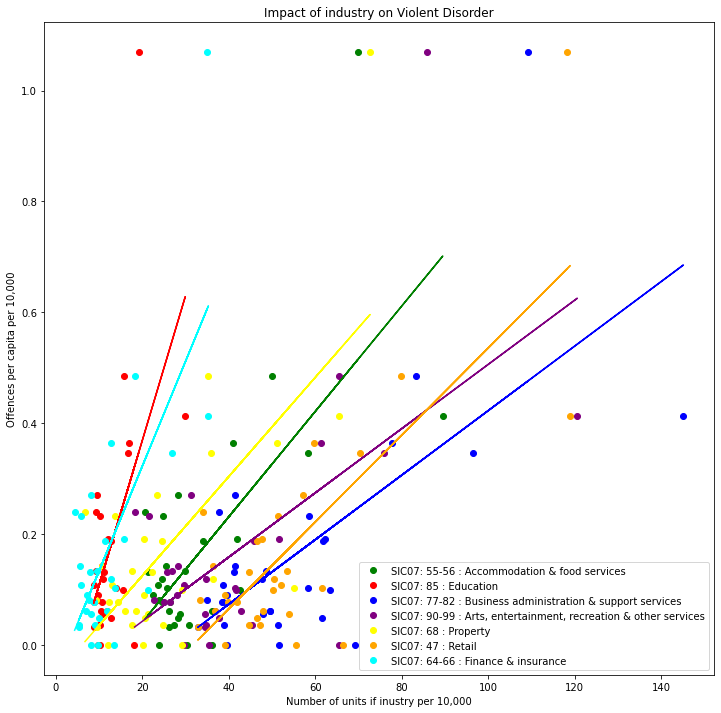

In [50]:
industry1 = 'SIC07: 55-56 : Accommodation & food services'
industry2 = 'SIC07: 85 : Education'
industry3 = 'SIC07: 77-82 : Business administration & support services'
industry4 = 'SIC07: 90-99 : Arts, entertainment, recreation & other services'
industry5 = 'SIC07: 68 : Property'
industry6 = 'SIC07: 47 : Retail'
industry7 = 'SIC07: 64-66 : Finance & insurance'
crime = 'Violent Disorder'

plotData = adjMinorCrimeLocalUnits.drop('Westminster', axis=0)

plt.rcParams["figure.figsize"] = (12,12)
plt.plot(plotData[industry1],plotData[crime],'o', color='green', label= industry1)
plt.plot(plotData[industry2],plotData[crime],'o', color='red', label = industry2)
plt.plot(plotData[industry3],plotData[crime],'o', color='blue', label = industry3)
plt.plot(plotData[industry4],plotData[crime],'o', color='purple', label = industry4)
plt.plot(plotData[industry5],plotData[crime],'o', color='yellow', label = industry5)
plt.plot(plotData[industry6],plotData[crime],'o', color='orange', label = industry6)
plt.plot(plotData[industry7],plotData[crime],'o', color='cyan', label = industry7)
plt.title("Impact of industry on " + crime)
plt.xlabel("Number of units if inustry per 10,000")
plt.ylabel("Offences per capita per 10,000")
plt.legend()

#calculate and plot simple lines of best fit
x1=plotData[industry1]
x2=plotData[industry2]
x3=plotData[industry3]
x4=plotData[industry4]
x5=plotData[industry5]
x6=plotData[industry6]
x7=plotData[industry7]
y=plotData[crime]

m1, b = np. polyfit(x1, y, 1) #m = slope, b = intercept.
plt.plot(x1, m1*x1 + b, color='green') # add line of best fit.

m2, b = np. polyfit(x2, y, 1) #m = slope, b = intercept.
plt.plot(x2, m2*x2 + b, color='red') # add line of best fit.

m3, b = np. polyfit(x3, y, 1) #m = slope, b = intercept.
plt.plot(x3, m3*x3 + b, color='blue') # add line of best fit.

m4, b = np. polyfit(x4, y, 1) #m = slope, b = intercept.
plt.plot(x4, m4*x4 + b, color='purple') # add line of best fit.

m5, b = np. polyfit(x5, y, 1) #m = slope, b = intercept.
plt.plot(x5, m5*x5 + b, color='yellow') # add line of best fit.

m6, b = np. polyfit(x6, y, 1) #m = slope, b = intercept.
plt.plot(x6, m6*x6 + b, color='orange') # add line of best fit.

m7, b = np. polyfit(x7, y, 1) #m = slope, b = intercept.
plt.plot(x7, m7*x7 + b, color='cyan') # add line of best fit.

Education and Finance& Insurance have strongest link to violent disorder - though note correlation is week for education.

For completeness the heat map for major crime classifications excluding Westminster

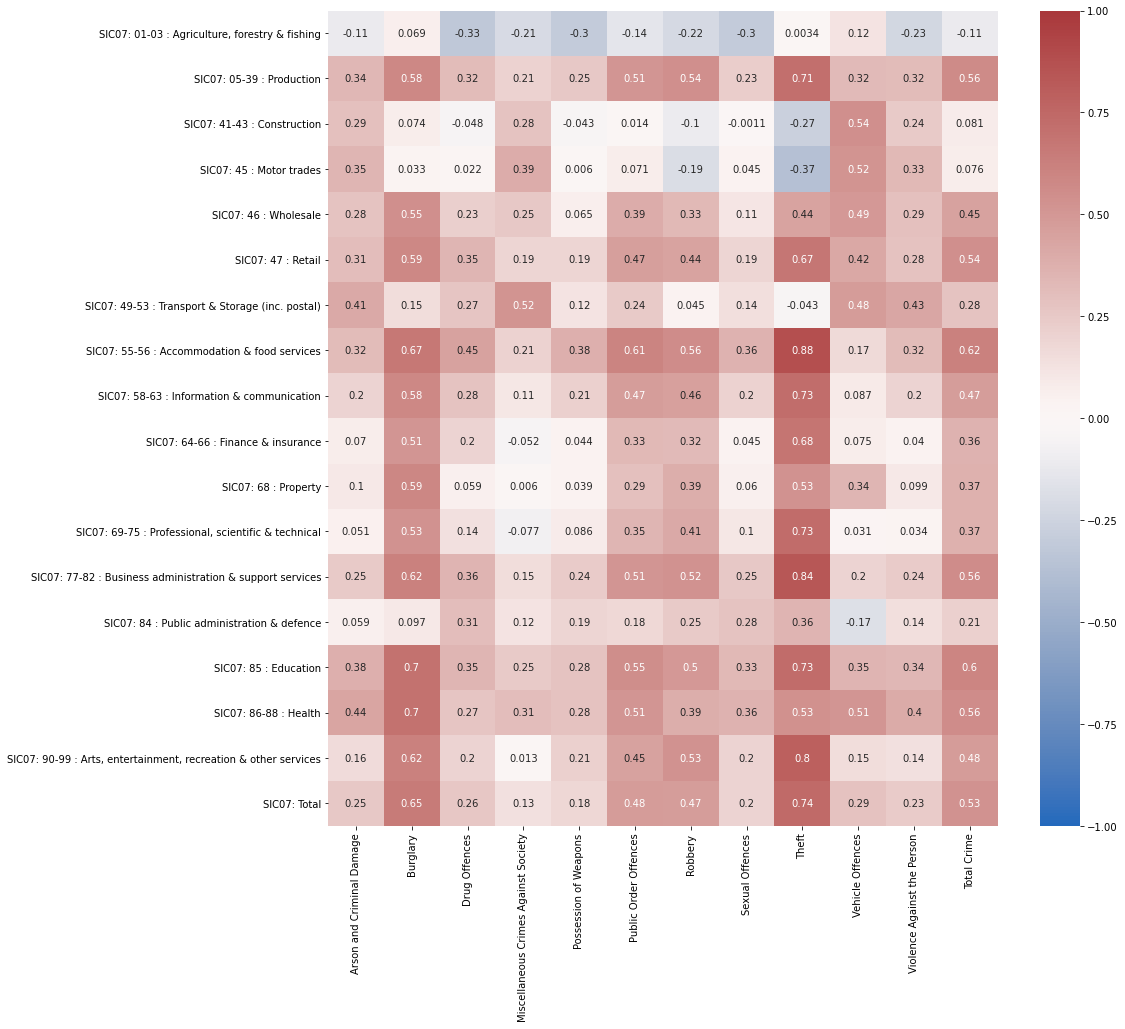

In [51]:


fig_dims = (15,15)
fig, ax = plt.subplots(figsize=fig_dims)

sn.color_palette("vlag", as_cmap=True)
sn.heatmap(plotDataRaw.corr().loc[ adjLocalUnits.columns,adjCrimeByBoroughMajor.columns], annot=True, cmap="vlag", vmin=-1, vmax=1)

plt.show()

Addtional graph for presentation

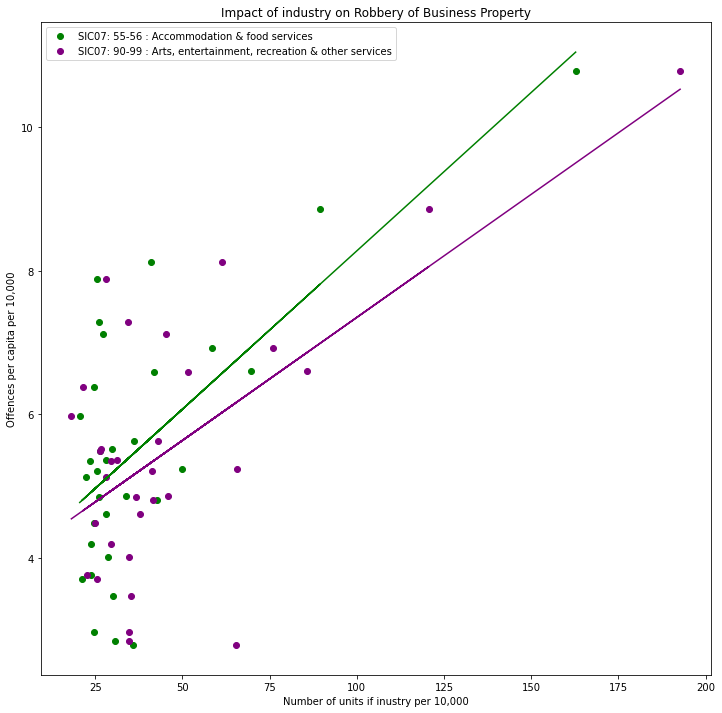

In [56]:
industry1 = 'SIC07: 55-56 : Accommodation & food services'
industry2 = 'SIC07: 85 : Education'
industry3 = 'SIC07: 77-82 : Business administration & support services'
industry4 = 'SIC07: 90-99 : Arts, entertainment, recreation & other services'
industry5 = 'SIC07: 68 : Property'
industry6 = 'SIC07: 47 : Retail'
industry7 = 'SIC07: 64-66 : Finance & insurance'
crime = 'Robbery of Business Property'

plotData = adjMinorCrimeLocalUnits #.drop('Westminster', axis=0)

plt.rcParams["figure.figsize"] = (12,12)
plt.plot(plotData[industry1],plotData[crime],'o', color='green', label= industry1)
#plt.plot(plotData[industry2],plotData[crime],'o', color='red', label = industry2)
#plt.plot(plotData[industry3],plotData[crime],'o', color='blue', label = industry3)
plt.plot(plotData[industry4],plotData[crime],'o', color='purple', label = industry4)
#plt.plot(plotData[industry5],plotData[crime],'o', color='yellow', label = industry5)
#plt.plot(plotData[industry6],plotData[crime],'o', color='orange', label = industry6)
#plt.plot(plotData[industry7],plotData[crime],'o', color='cyan', label = industry7)
plt.title("Impact of industry on " + crime)
plt.xlabel("Number of units if inustry per 10,000")
plt.ylabel("Offences per capita per 10,000")
plt.legend()

#calculate and plot simple lines of best fit
x1=plotData[industry1]
x2=plotData[industry2]
x3=plotData[industry3]
x4=plotData[industry4]
x5=plotData[industry5]
x6=plotData[industry6]
x7=plotData[industry7]
y=plotData[crime]

m1, b = np. polyfit(x1, y, 1) #m = slope, b = intercept.
plt.plot(x1, m1*x1 + b, color='green') # add line of best fit.

m2, b = np. polyfit(x2, y, 1) #m = slope, b = intercept.
#plt.plot(x2, m2*x2 + b, color='red') # add line of best fit.

m3, b = np. polyfit(x3, y, 1) #m = slope, b = intercept.
#plt.plot(x3, m3*x3 + b, color='blue') # add line of best fit.

m4, b = np. polyfit(x4, y, 1) #m = slope, b = intercept.
plt.plot(x4, m4*x4 + b, color='purple') # add line of best fit.

m5, b = np. polyfit(x5, y, 1) #m = slope, b = intercept.
#plt.plot(x5, m5*x5 + b, color='yellow') # add line of best fit.

m6, b = np. polyfit(x6, y, 1) #m = slope, b = intercept.
#plt.plot(x6, m6*x6 + b, color='orange') # add line of best fit.

m7, b = np. polyfit(x7, y, 1) #m = slope, b = intercept.
#plt.plot(x7, m7*x7 + b, color='cyan') # add line of best fit.